In [1]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold
from sklearn.inspection import permutation_importance

import seaborn as sns
# set colour palette
current_palette = sns.color_palette("GnBu_d",2)

import xgboost
import os
import pandas as pd
import numpy as np
import shap

# Shap Decode issue workaround
def changeByteLoc(self=None):
    return model_bytearray

In [2]:
HLAF_data = pd.read_csv(r'F:\Sam Butterfield\Desktop\NClSummerInternship\aggregation_datasets\ssas_mean.csv', index_col="eid")

HLAF_data

,day active bout length,day active number bout,day active percent time,day sed bout length,day sed number bout,day sed percent time,day sleep bout length,day sleep number bout,day sleep percent time,overnight active bout length,overnight active number bout,overnight active percent time,overnight sed bout length,overnight sed number bout,overnight sed percent time,overnight sleep bout length,overnight sleep number bout,overnight sleep percent time
eid,,,,,,,,,,,,,,,,,,
1000064,8.744416,6.190476,8.283335,52.929171,6.857143,39.170980,114.742249,1.095238,33.820577,0.000000,0.000000,0.000000,6.285714,0.285714,0.788672,514.595238,1.857143,93.834020
1000071,11.715695,4.730159,11.859339,42.764748,8.523810,52.201454,20.610166,1.142857,12.220530,0.000000,0.000000,0.000000,4.071429,0.571429,0.746965,762.380952,1.428571,99.237473
1000088,9.093962,73.079365,7.127946,23.475643,212.571429,26.085567,45.455188,241.190476,47.424765,8.563162,173.000000,11.071429,22.206841,208.857143,55.515873,330.761905,1.857143,8.829365
1000132,9.134428,4.238095,5.772770,44.844580,8.190476,42.350280,75.032230,2.142857,33.474069,0.952381,0.047619,0.137231,5.023810,0.857143,1.420338,358.476190,1.714286,83.882256
1000176,8.117831,3.873016,6.680581,58.104942,7.952381,66.258040,21.496385,1.000000,11.646336,3.531746,0.857143,0.911854,26.214286,2.000000,6.551841,665.142857,1.142857,85.494765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026091,7.014886,2.920635,5.260626,80.588724,6.000000,77.823346,11.421508,0.857143,4.329004,1.857143,0.285714,0.186273,54.666667,2.285714,12.193724,574.714286,1.142857,78.377991
6026203,10.950309,4.730159,7.858483,40.986922,8.904762,37.257120,58.199268,2.666667,32.732799,1.142857,0.190476,0.247372,2.000000,0.142857,0.432900,214.833333,2.000000,82.560297
6026224,11.452020,6.365079,13.048456,36.101578,8.428571,43.596856,22.762598,1.142857,13.737534,1.809524,0.095238,0.253080,8.595238,1.000000,2.517483,491.571429,1.142857,82.397602


In [3]:
ukbb_baseline = pd.read_parquet(r'F:\Sam Butterfield\Desktop\NClSummerInternship\ukbiobank_baseline.parquet')
ukbb_baseline

,eid,@310.0,@340.0,@460.0,@461.0,@470.0,@471.0,@480.0,@481.0,@490.0,...,fib_alveolitis,ramiprilgroup,MEDICATION_GROUPS2,MEDICATION_GROUPS3,CM_medication,MEDGROUPS_SYSMIS,CMD_SEDATIVES,waistcm_lowhrisk_female,waistcm_lowrisk_male,lowwaistcm_bothmalefemale
0,1000015,1,1943,36,,32,,93,,97,...,,,,,,0,,,1,1
1,1000027,0,1943,25,,32,,90,,105,...,,,,,,0,,,,0
2,1000039,0,1940,24,,32,,75,,88,...,,,1,,,1,,1,,1
3,1000040,0,1946,20,,25,,82,,108,...,,,,,,0,,,,0
4,1000053,1,1948,36,,36,,84,,97,...,,,,,,0,,,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502640,6026607,1,1966,44,,44,,107,,108,...,,,,,,0,,,,0
502641,6026610,0,1947,16,,14,,81,,98,...,,,,,1,0,1,,,0
502642,6026622,0,1969,22,,24,,77,,96,...,,,1,,,1,,1,,1
502643,6026636,1,1944,28,,30,,112,,113,...,,,,,,0,,,,0


In [4]:
ukbb_baseline.set_index('eid', drop=True, inplace=True)
ukbb_baseline

,@310.0,@340.0,@460.0,@461.0,@470.0,@471.0,@480.0,@481.0,@490.0,@491.0,...,fib_alveolitis,ramiprilgroup,MEDICATION_GROUPS2,MEDICATION_GROUPS3,CM_medication,MEDGROUPS_SYSMIS,CMD_SEDATIVES,waistcm_lowhrisk_female,waistcm_lowrisk_male,lowwaistcm_bothmalefemale
eid,,,,,,,,,,,,,,,,,,,,,
1000015,1,1943,36,,32,,93,,97,,...,,,,,,0,,,1,1
1000027,0,1943,25,,32,,90,,105,,...,,,,,,0,,,,0
1000039,0,1940,24,,32,,75,,88,,...,,,1,,,1,,1,,1
1000040,0,1946,20,,25,,82,,108,,...,,,,,,0,,,,0
1000053,1,1948,36,,36,,84,,97,,...,,,,,,0,,,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026607,1,1966,44,,44,,107,,108,,...,,,,,,0,,,,0
6026610,0,1947,16,,14,,81,,98,,...,,,,,1,0,1,,,0
6026622,0,1969,22,,24,,77,,96,,...,,,1,,,1,,1,,1


In [5]:
selected_ukbb = ukbb_baseline[["@230990.0","@310.0","@340.0","@210000.0","@530.0","@1890.0","@201160.0","@201170.0","@10700.0","@11600.0","@8740.0","@8940.0","@9140.0","@480.0","HEALTHY_CVD_T2D1_T2D2"]]
selected_ukbb = selected_ukbb.rename(columns={'@230990.0': 'body_fat', '@310.0': 'sex', "@340.0":"year_of_birth", "@210000.0":"ethnicity","@530.0":"date of assessment centre","@1890.0":"Townsend deprivation","@201160.0":"smoking status","@201170.0":"alcohol drinker status","@10700.0":"Time spent watching TV","@11600.0":"sleep duration","@8740.0":"duration of walks","@8940.0":"duration of moderate activity","@9140.0":"duration of vigorous activity","@480.0":"Waist circumference"})
selected_ukbb

,body_fat,sex,year_of_birth,ethnicity,date of assessment centre,Townsend deprivation,smoking status,alcohol drinker status,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,HEALTHY_CVD_T2D1_T2D2
eid,,,,,,,,,,,,,,,
1000015,26.2,1,1943,1001,04/11/2008,3.47322,1,2,3,6,35,30,,93,1
1000027,40.2,0,1943,1001,11/13/2007,-1.36771,0,2,4,7,20,15,15,90,
1000039,34.7,0,1940,1001,08/01/2009,-3.85071,0,2,2,8,45,20,,75,1
1000040,43.4,0,1946,1001,03/04/2008,0.848407,0,2,4,8,20,,,82,1
1000053,28.3,1,1948,1001,1/17/2008,-0.194389,0,2,3,8,30,40,40,84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026607,30.4,1,1966,1001,8/17/2007,5.69253,2,2,3,6,-1,-1,,107,1
6026610,42.9,0,1947,1001,06/03/2010,-3.37524,0,2,3,6,60,60,,81,1
6026622,31.5,0,1969,1001,03/06/2010,-1.82647,2,2,4,7,60,60,45,77,0


In [6]:
selected_ukbb['date of assessment centre'] = pd.to_datetime(selected_ukbb['date of assessment centre'])
selected_ukbb['year of assessment']= selected_ukbb['date of assessment centre'].dt.year
selected_ukbb["age at assessment centre"] = selected_ukbb["year of assessment"] - selected_ukbb["year_of_birth"]


In [7]:
selected_ukbb = selected_ukbb.drop(["date of assessment centre", "year of assessment", "year_of_birth"], axis=1)
selected_ukbb

,body_fat,sex,ethnicity,Townsend deprivation,smoking status,alcohol drinker status,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,HEALTHY_CVD_T2D1_T2D2,age at assessment centre
eid,,,,,,,,,,,,,,
1000015,26.2,1,1001,3.47322,1,2,3,6,35,30,,93,1,65
1000027,40.2,0,1001,-1.36771,0,2,4,7,20,15,15,90,,64
1000039,34.7,0,1001,-3.85071,0,2,2,8,45,20,,75,1,69
1000040,43.4,0,1001,0.848407,0,2,4,8,20,,,82,1,62
1000053,28.3,1,1001,-0.194389,0,2,3,8,30,40,40,84,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026607,30.4,1,1001,5.69253,2,2,3,6,-1,-1,,107,1,41
6026610,42.9,0,1001,-3.37524,0,2,3,6,60,60,,81,1,63
6026622,31.5,0,1001,-1.82647,2,2,4,7,60,60,45,77,0,41


In [8]:
HLAF_data_ukbb = HLAF_data.merge(selected_ukbb, left_index=True, right_index=True, how='inner')
HLAF_data_ukbb

,day active bout length,day active number bout,day active percent time,day sed bout length,day sed number bout,day sed percent time,day sleep bout length,day sleep number bout,day sleep percent time,overnight active bout length,...,smoking status,alcohol drinker status,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,HEALTHY_CVD_T2D1_T2D2,age at assessment centre
eid,,,,,,,,,,,,,,,,,,,,,
1000064,8.744416,6.190476,8.283335,52.929171,6.857143,39.170980,114.742249,1.095238,33.820577,0.000000,...,0,2,4,7,-1,-1,-1,95,,62
1000071,11.715695,4.730159,11.859339,42.764748,8.523810,52.201454,20.610166,1.142857,12.220530,0.000000,...,1,2,3,8,120,140,80,78,0,59
1000088,9.093962,73.079365,7.127946,23.475643,212.571429,26.085567,45.455188,241.190476,47.424765,8.563162,...,0,2,3,7,30,60,,75,0,70
1000132,9.134428,4.238095,5.772770,44.844580,8.190476,42.350280,75.032230,2.142857,33.474069,0.952381,...,1,2,4,9,20,30,,94,,59
1000176,8.117831,3.873016,6.680581,58.104942,7.952381,66.258040,21.496385,1.000000,11.646336,3.531746,...,2,2,0.5,8,30,20,,70,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026091,7.014886,2.920635,5.260626,80.588724,6.000000,77.823346,11.421508,0.857143,4.329004,1.857143,...,2,2,2,7,30,45,20,77,1,65
6026203,10.950309,4.730159,7.858483,40.986922,8.904762,37.257120,58.199268,2.666667,32.732799,1.142857,...,1,2,2,7,50,50,10,85,,55
6026224,11.452020,6.365079,13.048456,36.101578,8.428571,43.596856,22.762598,1.142857,13.737534,1.809524,...,0,2,0.5,7,30,60,50,74,0,61


In [9]:
EHR_phenotypes = pd.read_csv(r'F:\Sam Butterfield\Desktop\NClSummerInternship\EHR_phenotypes.csv',index_col='eid')
EHR_phenotypes

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


,disease,date,category
eid,,,
1000015,Appendicitis,2000-01-10,Procedure for Appendicitis
1000015,Coronary heart disease not otherwise specified,2001-04-27,Diagnosed (3)
1000015,Stable angina,2001-06-20,Stable angina (4)
1000015,Gastro-oesophageal reflux disease,2001-10-16,Diagnosis of Gastro-oesophageal reflux disease
1000015,Osteoarthritis (excl spine),2003-04-08,Diagnosis of Osteoarthritis (excl spine)
...,...,...,...
6026645,Chronic sinusitis,2013-02-26,Diagnosis of Chronic sinusitis
6026645,Urinary Incontinence,2013-12-10,Diagnosis of Urinary Incontinence
6026645,Asthma,2014-03-29,Diagnosis of Asthma


In [10]:
#Filter out individuals who have type-2 diabetes from phenotypes from EHR data
PD_t2d_population = EHR_phenotypes[EHR_phenotypes["category"] == "Type II diabetes mellitus (4)"]
PD_t2d_population


,disease,date,category
eid,,,
1000265,Diabetes,2015-09-04,Type II diabetes mellitus (4)
1000419,Diabetes,2011-08-01,Type II diabetes mellitus (4)
1000795,Diabetes,1999-01-01,Type II diabetes mellitus (4)
1001095,Diabetes,2016-01-26,Type II diabetes mellitus (4)
1001239,Diabetes,2013-12-17,Type II diabetes mellitus (4)
...,...,...,...
6025644,Diabetes,1996-06-28,Type II diabetes mellitus (4)
6025672,Diabetes,1993-11-01,Type II diabetes mellitus (4)
6025709,Diabetes,2002-01-04,Type II diabetes mellitus (4)


In [11]:
#Physical activity impact scores

activity_scores = pd.read_csv(r'F:\Sam Butterfield\Desktop\NClSummerInternship\gp_clinical_eid_activity_impact_score.csv')
activity_scores


,eid,activity_score
0,1000071,0.0
1,1000419,10.0
2,1000522,0.0
3,1000574,0.0
4,1000885,0.0
...,...,...
19847,6025994,0.0
19848,6026224,0.0
19849,6026398,0.0
19850,6026451,0.0


In [12]:
SC_t2d_population = HLAF_data_ukbb[(HLAF_data_ukbb["HEALTHY_CVD_T2D1_T2D2"] == '2') | (HLAF_data_ukbb["HEALTHY_CVD_T2D1_T2D2"] == '3')]
SC_t2d_population

,day active bout length,day active number bout,day active percent time,day sed bout length,day sed number bout,day sed percent time,day sleep bout length,day sleep number bout,day sleep percent time,overnight active bout length,...,smoking status,alcohol drinker status,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,HEALTHY_CVD_T2D1_T2D2,age at assessment centre
eid,,,,,,,,,,,,,,,,,,,,,
1004032,10.815544,3.825397,8.382226,41.730203,8.666667,51.303043,31.642305,1.952381,21.346705,0.523810,...,1,2,5,8,75,,,126,3,65
1004949,13.223738,4.333333,11.512866,54.584122,7.000000,56.314700,25.518634,1.333333,9.146702,4.309524,...,0,2,3,8,-1,30,-1,91,3,62
1006811,8.605554,2.301587,5.278370,109.602936,5.095238,78.848614,6.815210,0.523810,5.316276,0.619048,...,0,2,4,2,80,80,30,123,3,68
1011723,2.593972,0.682540,0.992370,25.754996,1.904762,18.054376,29.577307,1.428571,17.797878,0.761905,...,1,2,3,9,60,,10,115,3,61
1015274,11.029955,3.730159,7.154822,76.064577,6.333333,60.229720,21.910266,1.047619,18.287868,0.761905,...,1,2,3,7,60,,60,90,3,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013760,8.202466,2.666667,5.096099,54.466378,7.571429,53.393813,45.723688,2.857143,31.185614,2.563492,...,0,2,3,6,60,10,,108,2,64
6019959,8.632790,2.174603,3.699864,82.000594,6.238095,73.315364,23.017013,1.809524,15.025226,1.666667,...,1,2,2,5,15,,,128,3,57
6022001,9.174080,4.063492,8.036759,57.625056,7.714286,64.453992,15.712496,1.476190,10.189760,0.000000,...,1,2,4,7,60,60,,95,2,52


In [13]:
new_t2d_population_ids = list(set().union(list(PD_t2d_population.index),list(SC_t2d_population.index)))
len(new_t2d_population_ids)

19065

In [14]:
matching_ids = []

for eid_1 in HLAF_data_ukbb.index:
    for eid_2 in new_t2d_population_ids:
        if eid_1 == eid_2:
            matching_ids.append(eid_1)
            
print(len(matching_ids))
matching_ids = pd.Series(matching_ids)
matching_ids.drop_duplicates(inplace=True)
print(len(matching_ids))

3076
3076


In [15]:
new_t2d_population = HLAF_data_ukbb.loc[matching_ids]
new_t2d_population.drop_duplicates(inplace=True)
new_t2d_population.drop('HEALTHY_CVD_T2D1_T2D2', axis=1)
new_t2d_population['t2d_status'] = 1
new_t2d_population

,day active bout length,day active number bout,day active percent time,day sed bout length,day sed number bout,day sed percent time,day sleep bout length,day sleep number bout,day sleep percent time,overnight active bout length,...,alcohol drinker status,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,HEALTHY_CVD_T2D1_T2D2,age at assessment centre,t2d_status
eid,,,,,,,,,,,,,,,,,,,,,
1000419,9.723123,3.666667,6.456893,55.449123,7.952381,61.762615,25.533318,1.095238,16.644052,3.111111,...,2,2,7,45,60,30,97,1,53,1
1004032,10.815544,3.825397,8.382226,41.730203,8.666667,51.303043,31.642305,1.952381,21.346705,0.523810,...,2,5,8,75,,,126,3,65,1
1004801,7.076386,4.412698,5.550900,43.492370,7.380952,39.553830,56.272421,2.428571,36.121839,0.000000,...,1,3,8,60,45,,128,,54,1
1004949,13.223738,4.333333,11.512866,54.584122,7.000000,56.314700,25.518634,1.333333,9.146702,4.309524,...,2,3,8,-1,30,-1,91,3,62,1
1005787,13.746763,4.396825,10.885345,56.519915,7.142857,53.523133,20.148333,0.761905,13.607031,0.571429,...,2,0,8,90,30,10,81,0,64,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019959,8.632790,2.174603,3.699864,82.000594,6.238095,73.315364,23.017013,1.809524,15.025226,1.666667,...,2,2,5,15,,,128,3,57,1
6022001,9.174080,4.063492,8.036759,57.625056,7.714286,64.453992,15.712496,1.476190,10.189760,0.000000,...,2,4,7,60,60,,95,2,52,1
6023926,10.856731,5.730159,11.303040,49.015478,8.190476,47.622330,25.419696,1.238095,18.468550,1.000000,...,2,4,7,-1,,-1,106,3,61,1


In [16]:
control_population = HLAF_data_ukbb
HLAF_data_ukbb

,day active bout length,day active number bout,day active percent time,day sed bout length,day sed number bout,day sed percent time,day sleep bout length,day sleep number bout,day sleep percent time,overnight active bout length,...,smoking status,alcohol drinker status,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,HEALTHY_CVD_T2D1_T2D2,age at assessment centre
eid,,,,,,,,,,,,,,,,,,,,,
1000064,8.744416,6.190476,8.283335,52.929171,6.857143,39.170980,114.742249,1.095238,33.820577,0.000000,...,0,2,4,7,-1,-1,-1,95,,62
1000071,11.715695,4.730159,11.859339,42.764748,8.523810,52.201454,20.610166,1.142857,12.220530,0.000000,...,1,2,3,8,120,140,80,78,0,59
1000088,9.093962,73.079365,7.127946,23.475643,212.571429,26.085567,45.455188,241.190476,47.424765,8.563162,...,0,2,3,7,30,60,,75,0,70
1000132,9.134428,4.238095,5.772770,44.844580,8.190476,42.350280,75.032230,2.142857,33.474069,0.952381,...,1,2,4,9,20,30,,94,,59
1000176,8.117831,3.873016,6.680581,58.104942,7.952381,66.258040,21.496385,1.000000,11.646336,3.531746,...,2,2,0.5,8,30,20,,70,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026091,7.014886,2.920635,5.260626,80.588724,6.000000,77.823346,11.421508,0.857143,4.329004,1.857143,...,2,2,2,7,30,45,20,77,1,65
6026203,10.950309,4.730159,7.858483,40.986922,8.904762,37.257120,58.199268,2.666667,32.732799,1.142857,...,1,2,2,7,50,50,10,85,,55
6026224,11.452020,6.365079,13.048456,36.101578,8.428571,43.596856,22.762598,1.142857,13.737534,1.809524,...,0,2,0.5,7,30,60,50,74,0,61


In [17]:
real_controls_ids = activity_scores[activity_scores['activity_score'] == 0]
real_controls_ids

,eid,activity_score
0,1000071,0.0
2,1000522,0.0
3,1000574,0.0
4,1000885,0.0
5,1001785,0.0
...,...,...
19846,6025431,0.0
19847,6025994,0.0
19848,6026224,0.0
19849,6026398,0.0


In [18]:
real_controls = control_population.merge(real_controls_ids,left_index=True,right_on='eid',how='inner')
real_controls

,day active bout length,day active number bout,day active percent time,day sed bout length,day sed number bout,day sed percent time,day sleep bout length,day sleep number bout,day sleep percent time,overnight active bout length,...,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,HEALTHY_CVD_T2D1_T2D2,age at assessment centre,eid,activity_score
0,11.715695,4.730159,11.859339,42.764748,8.523810,52.201454,20.610166,1.142857,12.220530,0.000000,...,3,8,120,140,80,78,0,59,1000071,0.0
3,14.783175,5.825397,14.163614,52.583880,7.285714,50.937729,5.578755,0.809524,5.216117,1.047619,...,0,8,30,60,30,69,0,54,1000574,0.0
4,15.368725,6.015873,17.239498,44.242423,7.047619,44.782168,6.924324,0.333333,3.499338,8.642857,...,0,8,30,40,60,70,0,49,1000885,0.0
5,7.072255,3.000000,5.379703,101.555024,5.714286,67.964737,17.425795,2.047619,13.369429,4.333333,...,4,8,10,10,120,106,0,57,1001785,0.0
6,14.239905,6.000000,16.122517,43.290168,7.666667,44.568007,12.580981,0.904762,7.064443,2.785714,...,3,7,-1,120,60,73,0,59,1002274,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19846,10.881922,4.968254,10.613666,54.058291,7.428571,49.945733,24.937458,1.000000,12.617013,2.809524,...,1,7,30,,,95,0,46,6025431,0.0
19847,8.175138,4.888889,8.853714,49.681014,9.476190,59.914513,18.357933,1.380952,13.524344,1.452381,...,2,7,-1,-1,30,101,1,47,6025994,0.0
19848,11.452020,6.365079,13.048456,36.101578,8.428571,43.596856,22.762598,1.142857,13.737534,1.809524,...,0.5,7,30,60,50,74,0,61,6026224,0.0
19849,11.312097,5.968254,12.091661,43.793202,8.238095,48.179654,24.122686,0.952381,15.545363,0.738095,...,4,8,50,60,,102,1,57,6026398,0.0


In [19]:
real_controls.set_index("eid",drop=True,inplace=True)
real_controls

,day active bout length,day active number bout,day active percent time,day sed bout length,day sed number bout,day sed percent time,day sleep bout length,day sleep number bout,day sleep percent time,overnight active bout length,...,alcohol drinker status,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,HEALTHY_CVD_T2D1_T2D2,age at assessment centre,activity_score
eid,,,,,,,,,,,,,,,,,,,,,
1000071,11.715695,4.730159,11.859339,42.764748,8.523810,52.201454,20.610166,1.142857,12.220530,0.000000,...,2,3,8,120,140,80,78,0,59,0.0
1000574,14.783175,5.825397,14.163614,52.583880,7.285714,50.937729,5.578755,0.809524,5.216117,1.047619,...,2,0,8,30,60,30,69,0,54,0.0
1000885,15.368725,6.015873,17.239498,44.242423,7.047619,44.782168,6.924324,0.333333,3.499338,8.642857,...,2,0,8,30,40,60,70,0,49,0.0
1001785,7.072255,3.000000,5.379703,101.555024,5.714286,67.964737,17.425795,2.047619,13.369429,4.333333,...,2,4,8,10,10,120,106,0,57,0.0
1002274,14.239905,6.000000,16.122517,43.290168,7.666667,44.568007,12.580981,0.904762,7.064443,2.785714,...,2,3,7,-1,120,60,73,0,59,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6025431,10.881922,4.968254,10.613666,54.058291,7.428571,49.945733,24.937458,1.000000,12.617013,2.809524,...,2,1,7,30,,,95,0,46,0.0
6025994,8.175138,4.888889,8.853714,49.681014,9.476190,59.914513,18.357933,1.380952,13.524344,1.452381,...,2,2,7,-1,-1,30,101,1,47,0.0
6026224,11.452020,6.365079,13.048456,36.101578,8.428571,43.596856,22.762598,1.142857,13.737534,1.809524,...,2,0.5,7,30,60,50,74,0,61,0.0


In [20]:
real_controls = real_controls.drop(["HEALTHY_CVD_T2D1_T2D2","activity_score"], axis=1)

In [21]:
real_controls

,day active bout length,day active number bout,day active percent time,day sed bout length,day sed number bout,day sed percent time,day sleep bout length,day sleep number bout,day sleep percent time,overnight active bout length,...,Townsend deprivation,smoking status,alcohol drinker status,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,age at assessment centre
eid,,,,,,,,,,,,,,,,,,,,,
1000071,11.715695,4.730159,11.859339,42.764748,8.523810,52.201454,20.610166,1.142857,12.220530,0.000000,...,-3.68553,1,2,3,8,120,140,80,78,59
1000574,14.783175,5.825397,14.163614,52.583880,7.285714,50.937729,5.578755,0.809524,5.216117,1.047619,...,-4.2727,0,2,0,8,30,60,30,69,54
1000885,15.368725,6.015873,17.239498,44.242423,7.047619,44.782168,6.924324,0.333333,3.499338,8.642857,...,0.285532,0,2,0,8,30,40,60,70,49
1001785,7.072255,3.000000,5.379703,101.555024,5.714286,67.964737,17.425795,2.047619,13.369429,4.333333,...,-1.62273,0,2,4,8,10,10,120,106,57
1002274,14.239905,6.000000,16.122517,43.290168,7.666667,44.568007,12.580981,0.904762,7.064443,2.785714,...,-4.33835,0,2,3,7,-1,120,60,73,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6025431,10.881922,4.968254,10.613666,54.058291,7.428571,49.945733,24.937458,1.000000,12.617013,2.809524,...,-3.21497,1,2,1,7,30,,,95,46
6025994,8.175138,4.888889,8.853714,49.681014,9.476190,59.914513,18.357933,1.380952,13.524344,1.452381,...,-0.0813594,0,2,2,7,-1,-1,30,101,47
6026224,11.452020,6.365079,13.048456,36.101578,8.428571,43.596856,22.762598,1.142857,13.737534,1.809524,...,-0.353374,0,2,0.5,7,30,60,50,74,61


In [22]:
#Identify diabetics with no activity impairment
common_t2d_control = real_controls.merge(new_t2d_population,left_index=True,right_index=True,how='inner')
common_t2d_control

,day active bout length_x,day active number bout_x,day active percent time_x,day sed bout length_x,day sed number bout_x,day sed percent time_x,day sleep bout length_x,day sleep number bout_x,day sleep percent time_x,overnight active bout length_x,...,alcohol drinker status_y,Time spent watching TV_y,sleep duration_y,duration of walks_y,duration of moderate activity_y,duration of vigorous activity_y,Waist circumference_y,HEALTHY_CVD_T2D1_T2D2,age at assessment centre_y,t2d_status
eid,,,,,,,,,,,,,,,,,,,,,
1005787,13.746763,4.396825,10.885345,56.519915,7.142857,53.523133,20.148333,0.761905,13.607031,0.571429,...,2,0,8,90,30,10,81,0,64,1
1021133,9.957067,4.777778,7.337491,44.644953,8.428571,48.492063,44.992063,3.380952,27.817460,0.000000,...,2,5,7,,,,83,1,59,1
1023291,11.151222,5.238095,11.239168,54.373436,7.476190,50.696836,22.988066,2.142857,15.579146,2.000000,...,2,3,6,50,15,10,114,3,63,1
1057888,7.396359,2.936508,3.611111,72.137925,7.714286,63.809524,43.013152,2.476190,23.764172,0.380952,...,2,7,5,60,10,,129,3,51,1
1062485,9.515250,5.269841,10.073263,34.532270,7.333333,36.606477,65.414242,2.238095,33.160706,0.619048,...,2,2,6,30,30,,87,0,59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5977332,8.363018,3.761905,5.956453,54.101520,9.428571,57.316610,36.252793,3.857143,24.814031,0.809524,...,2,3,6,90,15,,100,1,60,1
5977546,8.706835,4.619048,6.851546,45.611497,10.095238,58.477842,32.877365,2.047619,18.469584,0.238095,...,2,2,7,15,15,10,122,3,55,1
5983649,7.901457,2.619048,4.790853,66.476466,7.476190,65.906788,29.870423,2.857143,19.481835,0.000000,...,2,8,8,60,30,30,115,3,56,1


In [23]:
#Drop T2D individuals with no activity impairment from control population
real_controls.drop(common_t2d_control.index,axis=0,inplace=True)
real_controls

,day active bout length,day active number bout,day active percent time,day sed bout length,day sed number bout,day sed percent time,day sleep bout length,day sleep number bout,day sleep percent time,overnight active bout length,...,Townsend deprivation,smoking status,alcohol drinker status,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,age at assessment centre
eid,,,,,,,,,,,,,,,,,,,,,
1000071,11.715695,4.730159,11.859339,42.764748,8.523810,52.201454,20.610166,1.142857,12.220530,0.000000,...,-3.68553,1,2,3,8,120,140,80,78,59
1000574,14.783175,5.825397,14.163614,52.583880,7.285714,50.937729,5.578755,0.809524,5.216117,1.047619,...,-4.2727,0,2,0,8,30,60,30,69,54
1000885,15.368725,6.015873,17.239498,44.242423,7.047619,44.782168,6.924324,0.333333,3.499338,8.642857,...,0.285532,0,2,0,8,30,40,60,70,49
1001785,7.072255,3.000000,5.379703,101.555024,5.714286,67.964737,17.425795,2.047619,13.369429,4.333333,...,-1.62273,0,2,4,8,10,10,120,106,57
1002274,14.239905,6.000000,16.122517,43.290168,7.666667,44.568007,12.580981,0.904762,7.064443,2.785714,...,-4.33835,0,2,3,7,-1,120,60,73,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6025431,10.881922,4.968254,10.613666,54.058291,7.428571,49.945733,24.937458,1.000000,12.617013,2.809524,...,-3.21497,1,2,1,7,30,,,95,46
6025994,8.175138,4.888889,8.853714,49.681014,9.476190,59.914513,18.357933,1.380952,13.524344,1.452381,...,-0.0813594,0,2,2,7,-1,-1,30,101,47
6026224,11.452020,6.365079,13.048456,36.101578,8.428571,43.596856,22.762598,1.142857,13.737534,1.809524,...,-0.353374,0,2,0.5,7,30,60,50,74,61


In [24]:
real_controls['t2d_status'] = 0
real_controls

,day active bout length,day active number bout,day active percent time,day sed bout length,day sed number bout,day sed percent time,day sleep bout length,day sleep number bout,day sleep percent time,overnight active bout length,...,smoking status,alcohol drinker status,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,age at assessment centre,t2d_status
eid,,,,,,,,,,,,,,,,,,,,,
1000071,11.715695,4.730159,11.859339,42.764748,8.523810,52.201454,20.610166,1.142857,12.220530,0.000000,...,1,2,3,8,120,140,80,78,59,0
1000574,14.783175,5.825397,14.163614,52.583880,7.285714,50.937729,5.578755,0.809524,5.216117,1.047619,...,0,2,0,8,30,60,30,69,54,0
1000885,15.368725,6.015873,17.239498,44.242423,7.047619,44.782168,6.924324,0.333333,3.499338,8.642857,...,0,2,0,8,30,40,60,70,49,0
1001785,7.072255,3.000000,5.379703,101.555024,5.714286,67.964737,17.425795,2.047619,13.369429,4.333333,...,0,2,4,8,10,10,120,106,57,0
1002274,14.239905,6.000000,16.122517,43.290168,7.666667,44.568007,12.580981,0.904762,7.064443,2.785714,...,0,2,3,7,-1,120,60,73,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6025431,10.881922,4.968254,10.613666,54.058291,7.428571,49.945733,24.937458,1.000000,12.617013,2.809524,...,1,2,1,7,30,,,95,46,0
6025994,8.175138,4.888889,8.853714,49.681014,9.476190,59.914513,18.357933,1.380952,13.524344,1.452381,...,0,2,2,7,-1,-1,30,101,47,0
6026224,11.452020,6.365079,13.048456,36.101578,8.428571,43.596856,22.762598,1.142857,13.737534,1.809524,...,0,2,0.5,7,30,60,50,74,61,0


In [25]:
new_ground_truth = real_controls.append(new_t2d_population)
new_ground_truth = new_ground_truth.drop("HEALTHY_CVD_T2D1_T2D2",axis=1)
new_ground_truth

,day active bout length,day active number bout,day active percent time,day sed bout length,day sed number bout,day sed percent time,day sleep bout length,day sleep number bout,day sleep percent time,overnight active bout length,...,smoking status,alcohol drinker status,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,age at assessment centre,t2d_status
eid,,,,,,,,,,,,,,,,,,,,,
1000071,11.715695,4.730159,11.859339,42.764748,8.523810,52.201454,20.610166,1.142857,12.220530,0.000000,...,1,2,3,8,120,140,80,78,59,0
1000574,14.783175,5.825397,14.163614,52.583880,7.285714,50.937729,5.578755,0.809524,5.216117,1.047619,...,0,2,0,8,30,60,30,69,54,0
1000885,15.368725,6.015873,17.239498,44.242423,7.047619,44.782168,6.924324,0.333333,3.499338,8.642857,...,0,2,0,8,30,40,60,70,49,0
1001785,7.072255,3.000000,5.379703,101.555024,5.714286,67.964737,17.425795,2.047619,13.369429,4.333333,...,0,2,4,8,10,10,120,106,57,0
1002274,14.239905,6.000000,16.122517,43.290168,7.666667,44.568007,12.580981,0.904762,7.064443,2.785714,...,0,2,3,7,-1,120,60,73,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019959,8.632790,2.174603,3.699864,82.000594,6.238095,73.315364,23.017013,1.809524,15.025226,1.666667,...,1,2,2,5,15,,,128,57,1
6022001,9.174080,4.063492,8.036759,57.625056,7.714286,64.453992,15.712496,1.476190,10.189760,0.000000,...,1,2,4,7,60,60,,95,52,1
6023926,10.856731,5.730159,11.303040,49.015478,8.190476,47.622330,25.419696,1.238095,18.468550,1.000000,...,1,2,4,7,-1,,-1,106,61,1


In [26]:
new_ground_truth = new_ground_truth.replace(" ",np.nan,)
new_ground_truth

,day active bout length,day active number bout,day active percent time,day sed bout length,day sed number bout,day sed percent time,day sleep bout length,day sleep number bout,day sleep percent time,overnight active bout length,...,smoking status,alcohol drinker status,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,age at assessment centre,t2d_status
eid,,,,,,,,,,,,,,,,,,,,,
1000071,11.715695,4.730159,11.859339,42.764748,8.523810,52.201454,20.610166,1.142857,12.220530,0.000000,...,1,2,3,8,120,140,80,78,59,0
1000574,14.783175,5.825397,14.163614,52.583880,7.285714,50.937729,5.578755,0.809524,5.216117,1.047619,...,0,2,0,8,30,60,30,69,54,0
1000885,15.368725,6.015873,17.239498,44.242423,7.047619,44.782168,6.924324,0.333333,3.499338,8.642857,...,0,2,0,8,30,40,60,70,49,0
1001785,7.072255,3.000000,5.379703,101.555024,5.714286,67.964737,17.425795,2.047619,13.369429,4.333333,...,0,2,4,8,10,10,120,106,57,0
1002274,14.239905,6.000000,16.122517,43.290168,7.666667,44.568007,12.580981,0.904762,7.064443,2.785714,...,0,2,3,7,-1,120,60,73,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019959,8.632790,2.174603,3.699864,82.000594,6.238095,73.315364,23.017013,1.809524,15.025226,1.666667,...,1,2,2,5,15,NaN,NaN,128,57,1
6022001,9.174080,4.063492,8.036759,57.625056,7.714286,64.453992,15.712496,1.476190,10.189760,0.000000,...,1,2,4,7,60,60,NaN,95,52,1
6023926,10.856731,5.730159,11.303040,49.015478,8.190476,47.622330,25.419696,1.238095,18.468550,1.000000,...,1,2,4,7,-1,NaN,-1,106,61,1


In [27]:
percent_missing = new_ground_truth.isnull().sum() * 100 / len(new_ground_truth)
missing_value_df = pd.DataFrame({'column_name': new_ground_truth.columns,'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
#missing_value_df.to_csv("84k_missing_percentages.csv")
missing_value_df

,column_name,percent_missing
duration of vigorous activity,duration of vigorous activity,38.306487
duration of moderate activity,duration of moderate activity,16.398204
duration of walks,duration of walks,3.485609
body_fat,body_fat,1.408327
ethnicity,ethnicity,0.360884
Time spent watching TV,Time spent watching TV,0.334478
sleep duration,sleep duration,0.290467
smoking status,smoking status,0.272863
Waist circumference,Waist circumference,0.114427
Townsend deprivation,Townsend deprivation,0.088020


In [28]:
new_ground_truth.to_csv("HLAF_UKBB_12K.csv",index=True)

In [29]:
###############  PREPROCESSING STEPS OF NEW GROUND TRUTH DATA     ###################
#MISSING DATA IMPUTATION
#Impute missing categorical values with mode value
categorical_cols = ["sex","ethnicity","smoking status","alcohol drinker status"]
ukbb_vars_categorical = new_ground_truth[categorical_cols].copy()
ukbb_vars_categorical.set_index(new_ground_truth.index,inplace=True)

for column in ukbb_vars_categorical.columns:
    ukbb_vars_categorical[column].fillna(ukbb_vars_categorical[column].mode()[0], inplace=True)

ukbb_vars_categorical

,sex,ethnicity,smoking status,alcohol drinker status
eid,,,,
1000071,0,1001,1,2
1000574,0,1001,0,2
1000885,0,1003,0,2
1001785,1,1001,0,2
1002274,0,1001,0,2
...,...,...,...,...
6019959,1,1001,1,2
6022001,1,1001,1,2
6023926,1,1001,1,2


In [30]:
#Uses KNN to impute continuous values
from sklearn.impute import KNNImputer

imputed_hlaf_t2d = new_ground_truth
imputed_hlaf_t2d = imputed_hlaf_t2d.drop(["sex","ethnicity","smoking status","alcohol drinker status"],axis=1)
imputer = KNNImputer(n_neighbors=3, weights="distance",metric="nan_euclidean")
imputed_hlaf_t2d


,day active bout length,day active number bout,day active percent time,day sed bout length,day sed number bout,day sed percent time,day sleep bout length,day sleep number bout,day sleep percent time,overnight active bout length,...,body_fat,Townsend deprivation,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,age at assessment centre,t2d_status
eid,,,,,,,,,,,,,,,,,,,,,
1000071,11.715695,4.730159,11.859339,42.764748,8.523810,52.201454,20.610166,1.142857,12.220530,0.000000,...,32.5,-3.68553,3,8,120,140,80,78,59,0
1000574,14.783175,5.825397,14.163614,52.583880,7.285714,50.937729,5.578755,0.809524,5.216117,1.047619,...,23.6,-4.2727,0,8,30,60,30,69,54,0
1000885,15.368725,6.015873,17.239498,44.242423,7.047619,44.782168,6.924324,0.333333,3.499338,8.642857,...,25.6,0.285532,0,8,30,40,60,70,49,0
1001785,7.072255,3.000000,5.379703,101.555024,5.714286,67.964737,17.425795,2.047619,13.369429,4.333333,...,30.6,-1.62273,4,8,10,10,120,106,57,0
1002274,14.239905,6.000000,16.122517,43.290168,7.666667,44.568007,12.580981,0.904762,7.064443,2.785714,...,27.6,-4.33835,3,7,-1,120,60,73,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019959,8.632790,2.174603,3.699864,82.000594,6.238095,73.315364,23.017013,1.809524,15.025226,1.666667,...,36.9,0.975673,2,5,15,NaN,NaN,128,57,1
6022001,9.174080,4.063492,8.036759,57.625056,7.714286,64.453992,15.712496,1.476190,10.189760,0.000000,...,30.4,-3.50665,4,7,60,60,NaN,95,52,1
6023926,10.856731,5.730159,11.303040,49.015478,8.190476,47.622330,25.419696,1.238095,18.468550,1.000000,...,31.3,-1.39447,4,7,-1,NaN,-1,106,61,1


In [31]:
imputed= imputer.fit_transform(imputed_hlaf_t2d)
imputed_hlaf_t2d = pd.DataFrame(imputed, columns=imputed_hlaf_t2d.columns,index=new_ground_truth.index)
imputed_hlaf_t2d

,day active bout length,day active number bout,day active percent time,day sed bout length,day sed number bout,day sed percent time,day sleep bout length,day sleep number bout,day sleep percent time,overnight active bout length,...,body_fat,Townsend deprivation,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,age at assessment centre,t2d_status
eid,,,,,,,,,,,,,,,,,,,,,
1000071,11.715695,4.730159,11.859339,42.764748,8.523810,52.201454,20.610166,1.142857,12.220530,0.000000,...,32.5,-3.685530,3.0,8.0,120.0,140.000000,80.000000,78.0,59.0,0.0
1000574,14.783175,5.825397,14.163614,52.583880,7.285714,50.937729,5.578755,0.809524,5.216117,1.047619,...,23.6,-4.272700,0.0,8.0,30.0,60.000000,30.000000,69.0,54.0,0.0
1000885,15.368725,6.015873,17.239498,44.242423,7.047619,44.782168,6.924324,0.333333,3.499338,8.642857,...,25.6,0.285532,0.0,8.0,30.0,40.000000,60.000000,70.0,49.0,0.0
1001785,7.072255,3.000000,5.379703,101.555024,5.714286,67.964737,17.425795,2.047619,13.369429,4.333333,...,30.6,-1.622730,4.0,8.0,10.0,10.000000,120.000000,106.0,57.0,0.0
1002274,14.239905,6.000000,16.122517,43.290168,7.666667,44.568007,12.580981,0.904762,7.064443,2.785714,...,27.6,-4.338350,3.0,7.0,-1.0,120.000000,60.000000,73.0,59.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019959,8.632790,2.174603,3.699864,82.000594,6.238095,73.315364,23.017013,1.809524,15.025226,1.666667,...,36.9,0.975673,2.0,5.0,15.0,12.076431,22.417448,128.0,57.0,1.0
6022001,9.174080,4.063492,8.036759,57.625056,7.714286,64.453992,15.712496,1.476190,10.189760,0.000000,...,30.4,-3.506650,4.0,7.0,60.0,60.000000,47.447733,95.0,52.0,1.0
6023926,10.856731,5.730159,11.303040,49.015478,8.190476,47.622330,25.419696,1.238095,18.468550,1.000000,...,31.3,-1.394470,4.0,7.0,-1.0,14.223496,-1.000000,106.0,61.0,1.0


In [32]:
ukbb_vars_categorical.set_index(new_ground_truth.index,inplace=True)
ukbb_vars_categorical

,sex,ethnicity,smoking status,alcohol drinker status
eid,,,,
1000071,0,1001,1,2
1000574,0,1001,0,2
1000885,0,1003,0,2
1001785,1,1001,0,2
1002274,0,1001,0,2
...,...,...,...,...
6019959,1,1001,1,2
6022001,1,1001,1,2
6023926,1,1001,1,2


In [33]:
imputed_hlaf_t2d = imputed_hlaf_t2d.merge(ukbb_vars_categorical,left_index=True, right_index=True, how='inner')
imputed_hlaf_t2d.drop_duplicates(inplace=True)

imputed_hlaf_t2d

,day active bout length,day active number bout,day active percent time,day sed bout length,day sed number bout,day sed percent time,day sleep bout length,day sleep number bout,day sleep percent time,overnight active bout length,...,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,age at assessment centre,t2d_status,sex,ethnicity,smoking status,alcohol drinker status
eid,,,,,,,,,,,,,,,,,,,,,
1000071,11.715695,4.730159,11.859339,42.764748,8.523810,52.201454,20.610166,1.142857,12.220530,0.000000,...,120.0,140.000000,80.000000,78.0,59.0,0.0,0,1001,1,2
1000574,14.783175,5.825397,14.163614,52.583880,7.285714,50.937729,5.578755,0.809524,5.216117,1.047619,...,30.0,60.000000,30.000000,69.0,54.0,0.0,0,1001,0,2
1000885,15.368725,6.015873,17.239498,44.242423,7.047619,44.782168,6.924324,0.333333,3.499338,8.642857,...,30.0,40.000000,60.000000,70.0,49.0,0.0,0,1003,0,2
1001785,7.072255,3.000000,5.379703,101.555024,5.714286,67.964737,17.425795,2.047619,13.369429,4.333333,...,10.0,10.000000,120.000000,106.0,57.0,0.0,1,1001,0,2
1002274,14.239905,6.000000,16.122517,43.290168,7.666667,44.568007,12.580981,0.904762,7.064443,2.785714,...,-1.0,120.000000,60.000000,73.0,59.0,0.0,0,1001,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019959,8.632790,2.174603,3.699864,82.000594,6.238095,73.315364,23.017013,1.809524,15.025226,1.666667,...,15.0,12.076431,22.417448,128.0,57.0,1.0,1,1001,1,2
6022001,9.174080,4.063492,8.036759,57.625056,7.714286,64.453992,15.712496,1.476190,10.189760,0.000000,...,60.0,60.000000,47.447733,95.0,52.0,1.0,1,1001,1,2
6023926,10.856731,5.730159,11.303040,49.015478,8.190476,47.622330,25.419696,1.238095,18.468550,1.000000,...,-1.0,14.223496,-1.000000,106.0,61.0,1.0,1,1001,1,2


In [34]:
percent_missing = imputed_hlaf_t2d.isnull().sum() * 100 / len(imputed_hlaf_t2d)
missing_value_df_2 = pd.DataFrame({'column_name': imputed_hlaf_t2d.columns,'percent_missing': percent_missing})
missing_value_df_2.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df_2

,column_name,percent_missing
day active bout length,day active bout length,0.0
day active number bout,day active number bout,0.0
smoking status,smoking status,0.0
ethnicity,ethnicity,0.0
sex,sex,0.0
t2d_status,t2d_status,0.0
age at assessment centre,age at assessment centre,0.0
Waist circumference,Waist circumference,0.0
duration of vigorous activity,duration of vigorous activity,0.0
duration of moderate activity,duration of moderate activity,0.0


In [35]:
#ONE HOT ENCODING OF CATEGORICAL FEATURES
categorical_cols = ["sex","ethnicity","smoking status","alcohol drinker status"]
ukbb_vars_categorical = imputed_hlaf_t2d[categorical_cols]
for col in ukbb_vars_categorical.columns:
    ukbb_vars_categorical[col] = ukbb_vars_categorical[col].astype(str)
ukbb_vars_categorical_encoded = pd.get_dummies(ukbb_vars_categorical, prefix_sep="_", columns=categorical_cols)
ukbb_vars_categorical_encoded


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,sex_0,sex_1,ethnicity_1,ethnicity_1001,ethnicity_1002,ethnicity_1003,ethnicity_2,ethnicity_2001,ethnicity_2002,ethnicity_2003,...,ethnicity_4002,ethnicity_4003,ethnicity_5,ethnicity_6,smoking status_0,smoking status_1,smoking status_2,alcohol drinker status_0,alcohol drinker status_1,alcohol drinker status_2
eid,,,,,,,,,,,,,,,,,,,,,
1000071,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1000574,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1000885,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1001785,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1002274,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019959,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6022001,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6023926,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [36]:
#FEATURE SCALING
imputed_hlaf_t2d["body_fat"] = pd.to_numeric(imputed_hlaf_t2d["body_fat"])
imputed_hlaf_t2d["Townsend deprivation"] = pd.to_numeric(imputed_hlaf_t2d["Townsend deprivation"])
imputed_hlaf_t2d["Time spent watching TV"] = pd.to_numeric(imputed_hlaf_t2d["Time spent watching TV"])
imputed_hlaf_t2d["sleep duration"] = pd.to_numeric(imputed_hlaf_t2d["sleep duration"])
imputed_hlaf_t2d["duration of walks"] = pd.to_numeric(imputed_hlaf_t2d["duration of walks"])
imputed_hlaf_t2d["duration of moderate activity"] = pd.to_numeric(imputed_hlaf_t2d["duration of moderate activity"])
imputed_hlaf_t2d["duration of vigorous activity"] = pd.to_numeric(imputed_hlaf_t2d["duration of vigorous activity"])
imputed_hlaf_t2d["Waist circumference"] = pd.to_numeric(imputed_hlaf_t2d["Waist circumference"])
unscaled_imputed_t2d_controls = imputed_hlaf_t2d.drop(categorical_cols, axis=1)
unscaled_imputed_t2d_controls

,day active bout length,day active number bout,day active percent time,day sed bout length,day sed number bout,day sed percent time,day sleep bout length,day sleep number bout,day sleep percent time,overnight active bout length,...,body_fat,Townsend deprivation,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,age at assessment centre,t2d_status
eid,,,,,,,,,,,,,,,,,,,,,
1000071,11.715695,4.730159,11.859339,42.764748,8.523810,52.201454,20.610166,1.142857,12.220530,0.000000,...,32.5,-3.685530,3.0,8.0,120.0,140.000000,80.000000,78.0,59.0,0.0
1000574,14.783175,5.825397,14.163614,52.583880,7.285714,50.937729,5.578755,0.809524,5.216117,1.047619,...,23.6,-4.272700,0.0,8.0,30.0,60.000000,30.000000,69.0,54.0,0.0
1000885,15.368725,6.015873,17.239498,44.242423,7.047619,44.782168,6.924324,0.333333,3.499338,8.642857,...,25.6,0.285532,0.0,8.0,30.0,40.000000,60.000000,70.0,49.0,0.0
1001785,7.072255,3.000000,5.379703,101.555024,5.714286,67.964737,17.425795,2.047619,13.369429,4.333333,...,30.6,-1.622730,4.0,8.0,10.0,10.000000,120.000000,106.0,57.0,0.0
1002274,14.239905,6.000000,16.122517,43.290168,7.666667,44.568007,12.580981,0.904762,7.064443,2.785714,...,27.6,-4.338350,3.0,7.0,-1.0,120.000000,60.000000,73.0,59.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019959,8.632790,2.174603,3.699864,82.000594,6.238095,73.315364,23.017013,1.809524,15.025226,1.666667,...,36.9,0.975673,2.0,5.0,15.0,12.076431,22.417448,128.0,57.0,1.0
6022001,9.174080,4.063492,8.036759,57.625056,7.714286,64.453992,15.712496,1.476190,10.189760,0.000000,...,30.4,-3.506650,4.0,7.0,60.0,60.000000,47.447733,95.0,52.0,1.0
6023926,10.856731,5.730159,11.303040,49.015478,8.190476,47.622330,25.419696,1.238095,18.468550,1.000000,...,31.3,-1.394470,4.0,7.0,-1.0,14.223496,-1.000000,106.0,61.0,1.0


In [37]:
scaler = StandardScaler()
scaled_imputed_t2d_controls = unscaled_imputed_t2d_controls
scaled_imputed_t2d_controls = pd.DataFrame(scaler.fit_transform(unscaled_imputed_t2d_controls),columns=unscaled_imputed_t2d_controls.columns,index=unscaled_imputed_t2d_controls.index)
scaled_imputed_t2d_controls.drop_duplicates(inplace=True)
scaled_imputed_t2d_controls

,day active bout length,day active number bout,day active percent time,day sed bout length,day sed number bout,day sed percent time,day sleep bout length,day sleep number bout,day sleep percent time,overnight active bout length,...,body_fat,Townsend deprivation,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,age at assessment centre,t2d_status
eid,,,,,,,,,,,,,,,,,,,,,
1000071,0.560677,-0.193434,0.849613,-0.448013,-0.219283,0.117228,-0.488826,-0.247909,-0.631782,-0.963701,...,0.165920,-0.708157,0.221744,0.817667,1.067053,1.325640,1.202719,-0.948141,0.231631,-0.609322
1000574,1.753953,-0.109642,1.518214,0.061992,-0.239854,0.015174,-1.283531,-0.253256,-1.287776,-0.536288,...,-0.880296,-0.917243,-1.700715,0.817667,-0.324323,0.081850,-0.240380,-1.560684,-0.418297,-0.609322
1000885,1.981737,-0.095070,2.410703,-0.371262,-0.243810,-0.481926,-1.212391,-0.260895,-1.448560,2.562459,...,-0.645192,0.705904,-1.700715,0.817667,-0.324323,-0.229097,0.625479,-1.492623,-1.068224,-0.609322
1001785,-1.245661,-0.325800,-1.030497,2.605546,-0.265964,1.390213,-0.657182,-0.233394,-0.524182,0.804236,...,-0.057430,0.026388,0.862563,0.817667,-0.633517,-0.695518,2.357199,0.957549,-0.028340,-0.609322
1002274,1.542617,-0.096284,2.086603,-0.420722,-0.233525,-0.499221,-0.913326,-0.251728,-1.114672,0.172830,...,-0.410087,-0.940620,0.221744,-0.165155,-0.803574,1.014693,0.625479,-1.288442,0.231631,-0.609322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019959,-0.638600,-0.388947,-1.517913,1.589891,-0.257261,1.822310,-0.361576,-0.237214,-0.369109,-0.283725,...,0.683150,0.951657,-0.419076,-2.130799,-0.556219,-0.663235,-0.459228,2.454876,-0.028340,1.641168
6022001,-0.428033,-0.244437,-0.259534,0.323830,-0.232733,1.106698,-0.747764,-0.242561,-0.821972,-0.963701,...,-0.080940,-0.644459,0.862563,-0.165155,0.139469,0.081850,0.263196,0.208885,-0.678268,1.641168
6023926,0.226533,-0.116928,0.688199,-0.123351,-0.224821,-0.252565,-0.234547,-0.246381,-0.046627,-0.555716,...,0.024857,0.107670,0.862563,-0.165155,-0.803574,-0.629854,-1.135102,0.957549,0.491602,1.641168


In [38]:
ukbb_vars_categorical_encoded
scaled_imputed_t2d_controls = scaled_imputed_t2d_controls.merge(ukbb_vars_categorical_encoded, left_index=True, right_index=True,how="inner")
scaled_imputed_t2d_controls.drop_duplicates(inplace=True)
scaled_imputed_t2d_controls.drop('t2d_status',axis=1,inplace=True)
scaled_imputed_t2d_controls['t2d_status'] = unscaled_imputed_t2d_controls['t2d_status']
scaled_imputed_t2d_controls

,day active bout length,day active number bout,day active percent time,day sed bout length,day sed number bout,day sed percent time,day sleep bout length,day sleep number bout,day sleep percent time,overnight active bout length,...,ethnicity_4003,ethnicity_5,ethnicity_6,smoking status_0,smoking status_1,smoking status_2,alcohol drinker status_0,alcohol drinker status_1,alcohol drinker status_2,t2d_status
eid,,,,,,,,,,,,,,,,,,,,,
1000071,0.560677,-0.193434,0.849613,-0.448013,-0.219283,0.117228,-0.488826,-0.247909,-0.631782,-0.963701,...,0,0,0,0,1,0,0,0,1,0.0
1000574,1.753953,-0.109642,1.518214,0.061992,-0.239854,0.015174,-1.283531,-0.253256,-1.287776,-0.536288,...,0,0,0,1,0,0,0,0,1,0.0
1000885,1.981737,-0.095070,2.410703,-0.371262,-0.243810,-0.481926,-1.212391,-0.260895,-1.448560,2.562459,...,0,0,0,1,0,0,0,0,1,0.0
1001785,-1.245661,-0.325800,-1.030497,2.605546,-0.265964,1.390213,-0.657182,-0.233394,-0.524182,0.804236,...,0,0,0,1,0,0,0,0,1,0.0
1002274,1.542617,-0.096284,2.086603,-0.420722,-0.233525,-0.499221,-0.913326,-0.251728,-1.114672,0.172830,...,0,0,0,1,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019959,-0.638600,-0.388947,-1.517913,1.589891,-0.257261,1.822310,-0.361576,-0.237214,-0.369109,-0.283725,...,0,0,0,0,1,0,0,0,1,1.0
6022001,-0.428033,-0.244437,-0.259534,0.323830,-0.232733,1.106698,-0.747764,-0.242561,-0.821972,-0.963701,...,0,0,0,0,1,0,0,0,1,1.0
6023926,0.226533,-0.116928,0.688199,-0.123351,-0.224821,-0.252565,-0.234547,-0.246381,-0.046627,-0.555716,...,0,0,0,0,1,0,0,0,1,1.0


In [39]:
scaled_imputed_t2d_controls['t2d_status'].value_counts()

0.0    8285
1.0    3076
Name: t2d_status, dtype: int64

In [40]:
X = scaled_imputed_t2d_controls.drop("t2d_status", axis=1)
X

,day active bout length,day active number bout,day active percent time,day sed bout length,day sed number bout,day sed percent time,day sleep bout length,day sleep number bout,day sleep percent time,overnight active bout length,...,ethnicity_4002,ethnicity_4003,ethnicity_5,ethnicity_6,smoking status_0,smoking status_1,smoking status_2,alcohol drinker status_0,alcohol drinker status_1,alcohol drinker status_2
eid,,,,,,,,,,,,,,,,,,,,,
1000071,0.560677,-0.193434,0.849613,-0.448013,-0.219283,0.117228,-0.488826,-0.247909,-0.631782,-0.963701,...,0,0,0,0,0,1,0,0,0,1
1000574,1.753953,-0.109642,1.518214,0.061992,-0.239854,0.015174,-1.283531,-0.253256,-1.287776,-0.536288,...,0,0,0,0,1,0,0,0,0,1
1000885,1.981737,-0.095070,2.410703,-0.371262,-0.243810,-0.481926,-1.212391,-0.260895,-1.448560,2.562459,...,0,0,0,0,1,0,0,0,0,1
1001785,-1.245661,-0.325800,-1.030497,2.605546,-0.265964,1.390213,-0.657182,-0.233394,-0.524182,0.804236,...,0,0,0,0,1,0,0,0,0,1
1002274,1.542617,-0.096284,2.086603,-0.420722,-0.233525,-0.499221,-0.913326,-0.251728,-1.114672,0.172830,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019959,-0.638600,-0.388947,-1.517913,1.589891,-0.257261,1.822310,-0.361576,-0.237214,-0.369109,-0.283725,...,0,0,0,0,0,1,0,0,0,1
6022001,-0.428033,-0.244437,-0.259534,0.323830,-0.232733,1.106698,-0.747764,-0.242561,-0.821972,-0.963701,...,0,0,0,0,0,1,0,0,0,1
6023926,0.226533,-0.116928,0.688199,-0.123351,-0.224821,-0.252565,-0.234547,-0.246381,-0.046627,-0.555716,...,0,0,0,0,0,1,0,0,0,1


In [41]:
y =scaled_imputed_t2d_controls['t2d_status']
y

eid
1000071    0.0
1000574    0.0
1000885    0.0
1001785    0.0
1002274    0.0
          ... 
6019959    1.0
6022001    1.0
6023926    1.0
6024863    1.0
6025302    1.0
Name: t2d_status, Length: 11361, dtype: float64

# T2D Prediction using HLAF + SDL features with half of controls

In [42]:
half_controls = scaled_imputed_t2d_controls[scaled_imputed_t2d_controls['t2d_status'] == 0]
half_controls = half_controls.sample(frac=0.5)
half_controls

,day active bout length,day active number bout,day active percent time,day sed bout length,day sed number bout,day sed percent time,day sleep bout length,day sleep number bout,day sleep percent time,overnight active bout length,...,ethnicity_4003,ethnicity_5,ethnicity_6,smoking status_0,smoking status_1,smoking status_2,alcohol drinker status_0,alcohol drinker status_1,alcohol drinker status_2,t2d_status
eid,,,,,,,,,,,,,,,,,,,,,
5332779,1.757972,-0.087783,1.655171,-0.407854,-0.230360,-0.530669,-0.658682,-0.233394,-0.863770,0.007693,...,0,0,0,0,1,0,0,0,1,0.0
3683565,-0.386310,-0.254152,-0.647720,0.589284,-0.236690,1.305214,-0.514675,-0.234158,-0.559617,3.838223,...,0,0,0,1,0,0,0,0,1,0.0
5104106,0.803320,-0.157003,0.376640,0.524853,-0.235107,0.547353,-0.535340,-0.234158,-0.672617,0.088642,...,0,0,0,1,0,0,0,0,1,0.0
1361106,-0.693555,-0.198291,-0.170289,-0.362186,-0.209788,0.337146,-0.108416,-0.229575,0.100764,-0.740280,...,0,0,0,0,0,1,0,0,1,0.0
4608527,0.543879,-0.252938,-0.287603,0.668812,-0.241437,0.735238,-0.443697,-0.240269,-0.247314,-0.808278,...,0,0,0,1,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453467,-0.240266,2.351886,-0.645493,-2.029361,4.854751,-1.513304,0.829850,3.047616,2.130239,2.676264,...,0,0,0,1,0,0,0,0,1,0.0
2448192,1.807670,-0.182504,1.230978,0.192351,-0.246184,-0.340026,0.110394,-0.234158,-0.470779,0.775094,...,0,0,0,1,0,0,0,0,1,0.0
2193346,0.950347,-0.215292,0.629930,0.132522,-0.237481,-0.155235,-0.171860,-0.247145,-0.176338,-0.963701,...,0,0,0,1,0,0,0,0,1,0.0


In [43]:
t2d_half_controls = half_controls.append(scaled_imputed_t2d_controls[scaled_imputed_t2d_controls['t2d_status'] == 1])
t2d_half_controls

,day active bout length,day active number bout,day active percent time,day sed bout length,day sed number bout,day sed percent time,day sleep bout length,day sleep number bout,day sleep percent time,overnight active bout length,...,ethnicity_4003,ethnicity_5,ethnicity_6,smoking status_0,smoking status_1,smoking status_2,alcohol drinker status_0,alcohol drinker status_1,alcohol drinker status_2,t2d_status
eid,,,,,,,,,,,,,,,,,,,,,
5332779,1.757972,-0.087783,1.655171,-0.407854,-0.230360,-0.530669,-0.658682,-0.233394,-0.863770,0.007693,...,0,0,0,0,1,0,0,0,1,0.0
3683565,-0.386310,-0.254152,-0.647720,0.589284,-0.236690,1.305214,-0.514675,-0.234158,-0.559617,3.838223,...,0,0,0,1,0,0,0,0,1,0.0
5104106,0.803320,-0.157003,0.376640,0.524853,-0.235107,0.547353,-0.535340,-0.234158,-0.672617,0.088642,...,0,0,0,1,0,0,0,0,1,0.0
1361106,-0.693555,-0.198291,-0.170289,-0.362186,-0.209788,0.337146,-0.108416,-0.229575,0.100764,-0.740280,...,0,0,0,0,0,1,0,0,1,0.0
4608527,0.543879,-0.252938,-0.287603,0.668812,-0.241437,0.735238,-0.443697,-0.240269,-0.247314,-0.808278,...,0,0,0,1,0,0,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019959,-0.638600,-0.388947,-1.517913,1.589891,-0.257261,1.822310,-0.361576,-0.237214,-0.369109,-0.283725,...,0,0,0,0,1,0,0,0,1,1.0
6022001,-0.428033,-0.244437,-0.259534,0.323830,-0.232733,1.106698,-0.747764,-0.242561,-0.821972,-0.963701,...,0,0,0,0,1,0,0,0,1,1.0
6023926,0.226533,-0.116928,0.688199,-0.123351,-0.224821,-0.252565,-0.234547,-0.246381,-0.046627,-0.555716,...,0,0,0,0,1,0,0,0,1,1.0


In [44]:
for col in t2d_half_controls.columns:
    print(col)

day active bout length
day active number bout
day active percent time
day sed bout length
day sed number bout
day sed percent time
day sleep bout length
day sleep number bout
day sleep percent time
overnight active bout length
overnight active number bout
overnight active percent time
overnight sed bout length
overnight sed number bout
overnight sed percent time
overnight sleep bout length
overnight sleep number bout
overnight sleep percent time
body_fat
Townsend deprivation
Time spent watching TV
sleep duration
duration of walks
duration of moderate activity
duration of vigorous activity
Waist circumference
age at assessment centre
sex_0
sex_1
ethnicity_1
ethnicity_1001
ethnicity_1002
ethnicity_1003
ethnicity_2
ethnicity_2001
ethnicity_2002
ethnicity_2003
ethnicity_2004
ethnicity_3
ethnicity_3001
ethnicity_3002
ethnicity_3003
ethnicity_3004
ethnicity_4001
ethnicity_4002
ethnicity_4003
ethnicity_5
ethnicity_6
smoking status_0
smoking status_1
smoking status_2
alcohol drinker status_0
a

In [45]:
X = t2d_half_controls.drop("t2d_status",axis=1)
X

,day active bout length,day active number bout,day active percent time,day sed bout length,day sed number bout,day sed percent time,day sleep bout length,day sleep number bout,day sleep percent time,overnight active bout length,...,ethnicity_4002,ethnicity_4003,ethnicity_5,ethnicity_6,smoking status_0,smoking status_1,smoking status_2,alcohol drinker status_0,alcohol drinker status_1,alcohol drinker status_2
eid,,,,,,,,,,,,,,,,,,,,,
5332779,1.757972,-0.087783,1.655171,-0.407854,-0.230360,-0.530669,-0.658682,-0.233394,-0.863770,0.007693,...,0,0,0,0,0,1,0,0,0,1
3683565,-0.386310,-0.254152,-0.647720,0.589284,-0.236690,1.305214,-0.514675,-0.234158,-0.559617,3.838223,...,0,0,0,0,1,0,0,0,0,1
5104106,0.803320,-0.157003,0.376640,0.524853,-0.235107,0.547353,-0.535340,-0.234158,-0.672617,0.088642,...,0,0,0,0,1,0,0,0,0,1
1361106,-0.693555,-0.198291,-0.170289,-0.362186,-0.209788,0.337146,-0.108416,-0.229575,0.100764,-0.740280,...,0,0,0,0,0,0,1,0,0,1
4608527,0.543879,-0.252938,-0.287603,0.668812,-0.241437,0.735238,-0.443697,-0.240269,-0.247314,-0.808278,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019959,-0.638600,-0.388947,-1.517913,1.589891,-0.257261,1.822310,-0.361576,-0.237214,-0.369109,-0.283725,...,0,0,0,0,0,1,0,0,0,1
6022001,-0.428033,-0.244437,-0.259534,0.323830,-0.232733,1.106698,-0.747764,-0.242561,-0.821972,-0.963701,...,0,0,0,0,0,1,0,0,0,1
6023926,0.226533,-0.116928,0.688199,-0.123351,-0.224821,-0.252565,-0.234547,-0.246381,-0.046627,-0.555716,...,0,0,0,0,0,1,0,0,0,1


In [46]:
y = t2d_half_controls['t2d_status']
y

eid
5332779    0.0
3683565    0.0
5104106    0.0
1361106    0.0
4608527    0.0
          ... 
6019959    1.0
6022001    1.0
6023926    1.0
6024863    1.0
6025302    1.0
Name: t2d_status, Length: 7218, dtype: float64

In [47]:
for col in X.columns:
    print(col)

day active bout length
day active number bout
day active percent time
day sed bout length
day sed number bout
day sed percent time
day sleep bout length
day sleep number bout
day sleep percent time
overnight active bout length
overnight active number bout
overnight active percent time
overnight sed bout length
overnight sed number bout
overnight sed percent time
overnight sleep bout length
overnight sleep number bout
overnight sleep percent time
body_fat
Townsend deprivation
Time spent watching TV
sleep duration
duration of walks
duration of moderate activity
duration of vigorous activity
Waist circumference
age at assessment centre
sex_0
sex_1
ethnicity_1
ethnicity_1001
ethnicity_1002
ethnicity_1003
ethnicity_2
ethnicity_2001
ethnicity_2002
ethnicity_2003
ethnicity_2004
ethnicity_3
ethnicity_3001
ethnicity_3002
ethnicity_3003
ethnicity_3004
ethnicity_4001
ethnicity_4002
ethnicity_4003
ethnicity_5
ethnicity_6
smoking status_0
smoking status_1
smoking status_2
alcohol drinker status_0
a

# ================ ML Models ================

# PREDICT WITH HALF THE NUMBER OF HEALTHY CONTROLS AND ALL DIABETICS FROM 84K 
## Random Forest

In [48]:
########### HLAF + SDL #############

#Random forest model
predicted_rf = cross_val_predict(RandomForestClassifier(n_estimators=150, max_depth=20,max_features=15,random_state=0), X, y, cv=10)
print(confusion_matrix(y,predicted_rf))
print(metrics.classification_report(y, predicted_rf))

[[3422  720]
 [ 889 2187]]
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81      4142
         1.0       0.75      0.71      0.73      3076

    accuracy                           0.78      7218
   macro avg       0.77      0.77      0.77      7218
weighted avg       0.78      0.78      0.78      7218



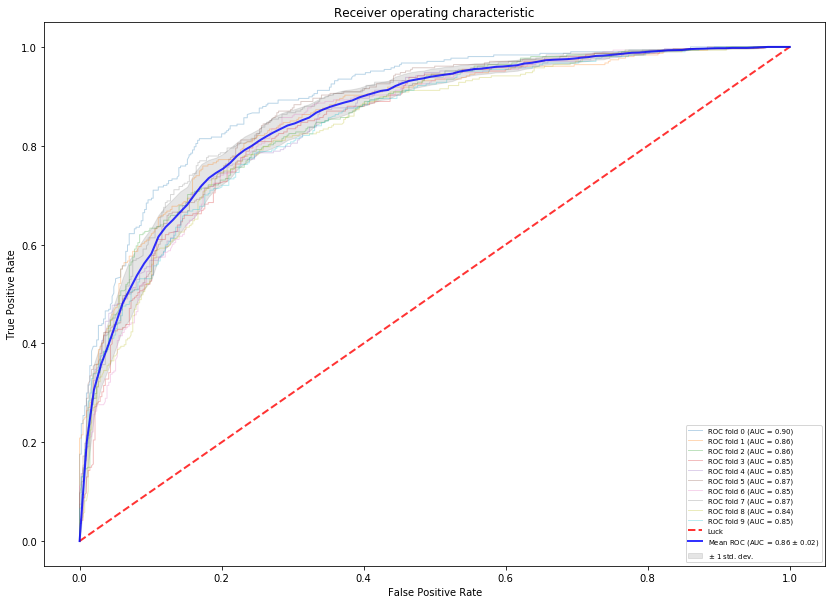

,AUC Train,AUC Test
0,1.0,0.896217
1,1.0,0.863777
2,1.0,0.857268
3,1.0,0.847034
4,1.0,0.853876
5,1.0,0.867107
6,1.0,0.849120
7,1.0,0.870765
8,1.0,0.838912
9,1.0,0.845446


In [49]:
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right", fontsize = 'x-small')
    plt.show()
    return (f, ax)
def compute_roc_auc(index):
    y_predict = clf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y.iloc[index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score
    
clf = RandomForestClassifier(n_estimators=150, max_depth=20,max_features=15,random_state=0)
n_splits = 10
cv = StratifiedKFold(n_splits=n_splits, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(n_splits)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

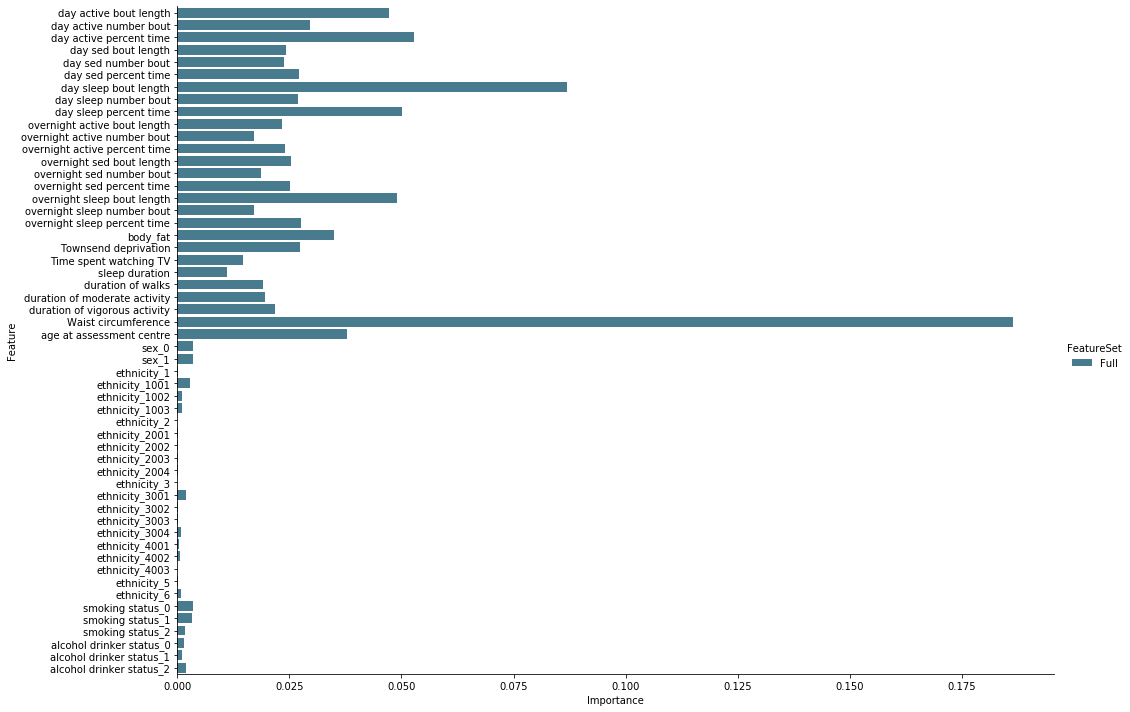

In [50]:
# RF Model Feature Importance
# Importance Extarction
imp = {'Feature': X.columns, 'Importance': clf.feature_importances_, 'FeatureSet': "Full"}
imp_df = pd.DataFrame(data=imp)
sns.catplot(x='Importance', y='Feature', hue='FeatureSet', data=imp_df, kind='bar', aspect=1.5, palette = current_palette, height = 10)

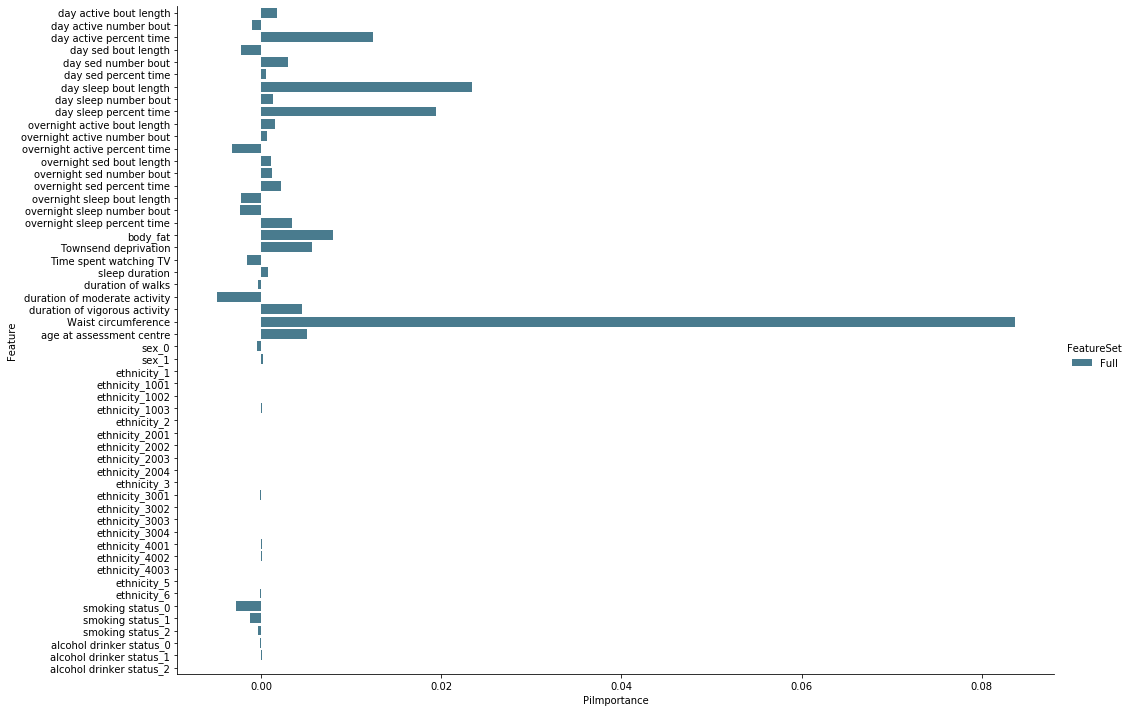

In [51]:
# RF Permutation Importance
pi = permutation_importance(clf, X.iloc[test], y.iloc[test], n_jobs=2, n_repeats=10)
pi_imp = {'Feature': X.columns, 'PiImportance': pi.importances_mean, 'FeatureSet': "Full"}
pi_imp_df = pd.DataFrame(data=pi_imp)
sns.catplot(x='PiImportance', y='Feature', hue='FeatureSet', data=pi_imp_df, kind='bar', aspect=1.5, palette = current_palette, height = 10)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


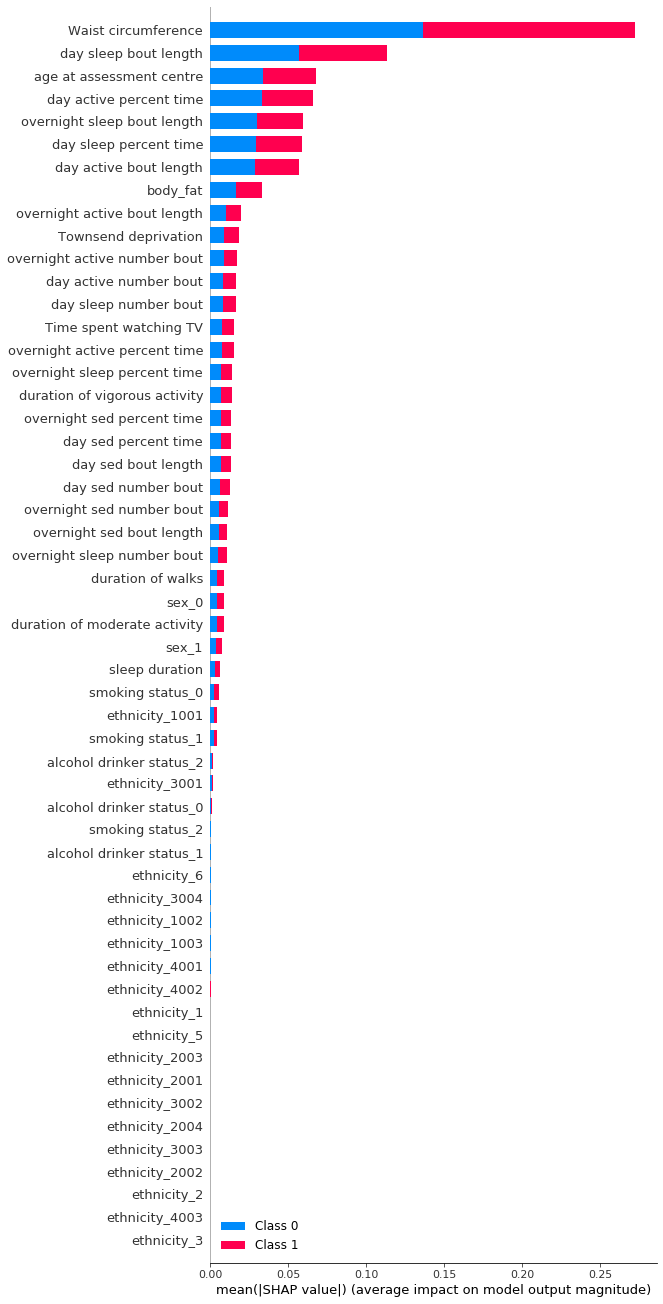

In [52]:
# RF Shap Values
shap_values = shap.TreeExplainer(clf).shap_values(X.iloc[train])
shap.summary_plot(shap_values, X.iloc[train], feature_names=X.columns, max_display=100)

## Logistic Regression

In [53]:
#Logistic regression

predicted_logit = cross_val_predict(LogisticRegression(multi_class="multinomial", solver='lbfgs', max_iter = 2000), X, y, cv=10)
print(confusion_matrix(y, predicted_logit))
print(metrics.classification_report(y, predicted_logit))

[[3450  692]
 [ 899 2177]]
              precision    recall  f1-score   support

         0.0       0.79      0.83      0.81      4142
         1.0       0.76      0.71      0.73      3076

    accuracy                           0.78      7218
   macro avg       0.78      0.77      0.77      7218
weighted avg       0.78      0.78      0.78      7218



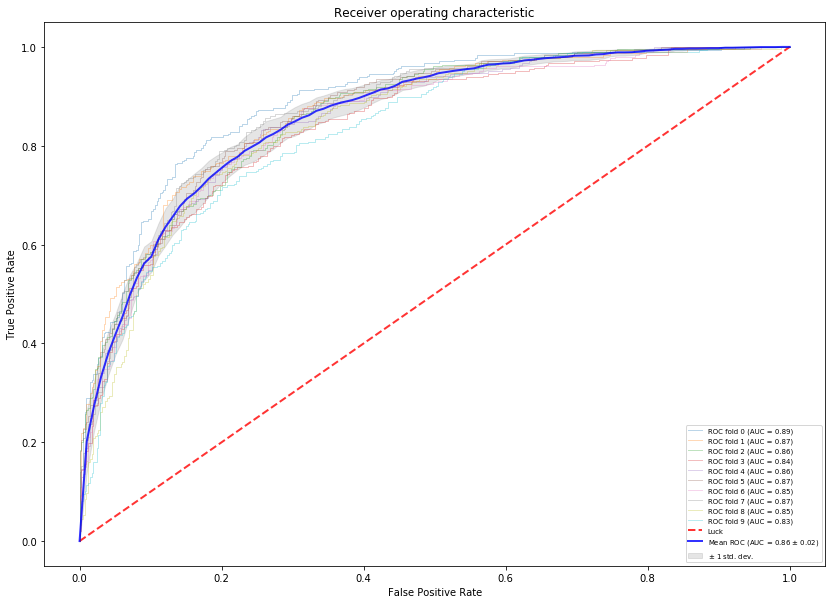

,AUC Train,AUC Test
0,0.860566,0.889416
1,0.862645,0.870256
2,0.863718,0.863832
3,0.865719,0.844023
4,0.864464,0.856021
5,0.862979,0.867730
6,0.864671,0.852453
7,0.862870,0.870161
8,0.865420,0.847779
9,0.866971,0.834466


In [54]:
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right", fontsize = 'x-small')
    plt.show()
    return (f, ax)
def compute_roc_auc(index):
    y_predict = clf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y.iloc[index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score
    
clf = LogisticRegression(multi_class="multinomial", solver='lbfgs', max_iter = 2000)
n_splits = 10
cv = StratifiedKFold(n_splits=n_splits, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(n_splits)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

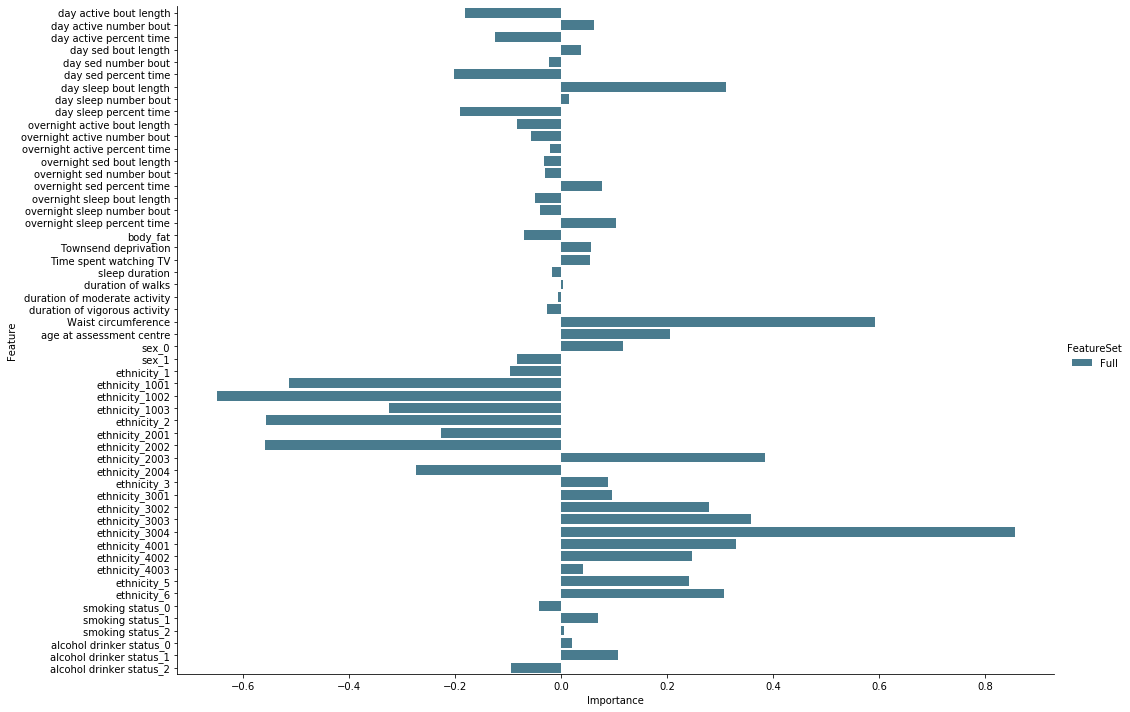

In [55]:
# LR Model Feature Importance
# Importance Extarction
imp = {'Feature': X.columns, 'Importance': clf.coef_[0], 'FeatureSet': "Full"}
imp_df = pd.DataFrame(data=imp)
sns.catplot(x='Importance', y='Feature', hue='FeatureSet', data=imp_df, kind='bar', aspect=1.5, palette = current_palette, height = 10)

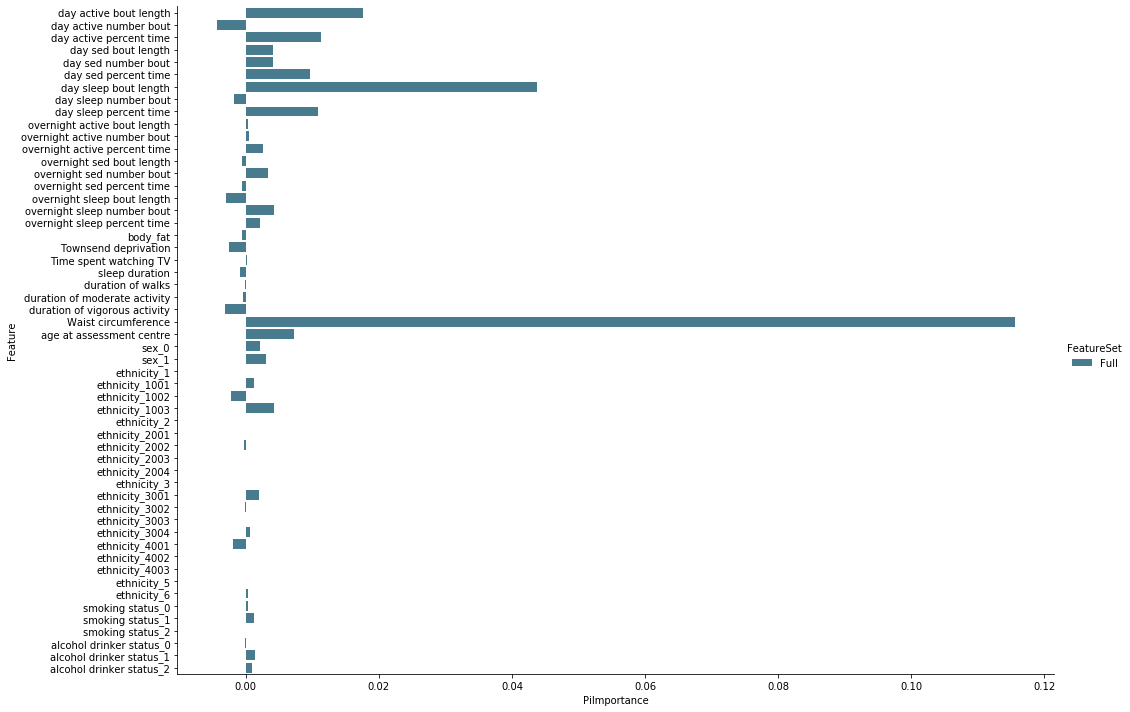

In [56]:
# LR Permutation Importance
pi = permutation_importance(clf, X.iloc[test], y.iloc[test], n_jobs=2, n_repeats=10)
pi_imp = {'Feature': X.columns, 'PiImportance': pi.importances_mean, 'FeatureSet': "Full"}
pi_imp_df = pd.DataFrame(data=pi_imp)
sns.catplot(x='PiImportance', y='Feature', hue='FeatureSet', data=pi_imp_df, kind='bar', aspect=1.5, palette = current_palette, height = 10)

The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!


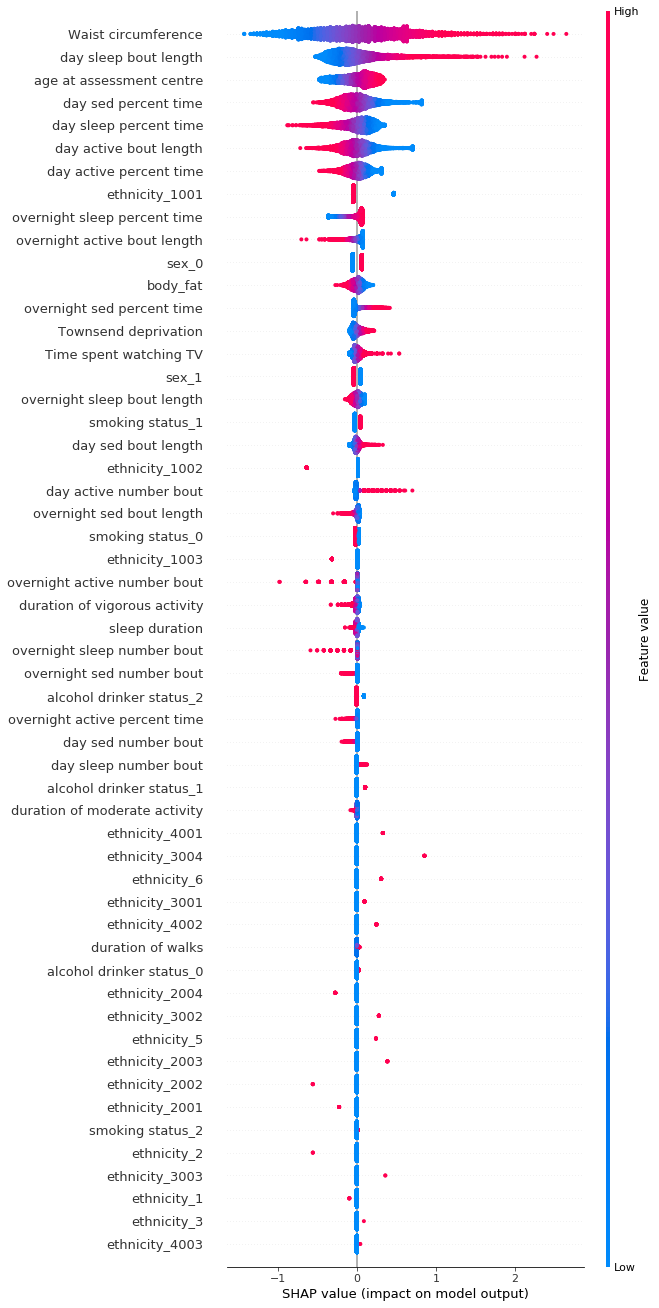

In [57]:
# LR Shap Values
shap_values = shap.LinearExplainer(clf, X.iloc[train], feature_perturbation="independent").shap_values(X.iloc[train])
shap.summary_plot(shap_values, X.iloc[train], feature_names=X.columns, max_display=100)

## XGBoost

In [58]:
#XGBoost 

import xgboost
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


# CV model
model = xgboost.XGBClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=7)
predicted_xgboost = cross_val_predict(model, X, y, cv=kfold)
print(confusion_matrix(y, predicted_xgboost))
print(metrics.classification_report(y, predicted_xgboost))

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


[[3342  800]
 [ 905 2171]]
              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80      4142
         1.0       0.73      0.71      0.72      3076

    accuracy                           0.76      7218
   macro avg       0.76      0.76      0.76      7218
weighted avg       0.76      0.76      0.76      7218



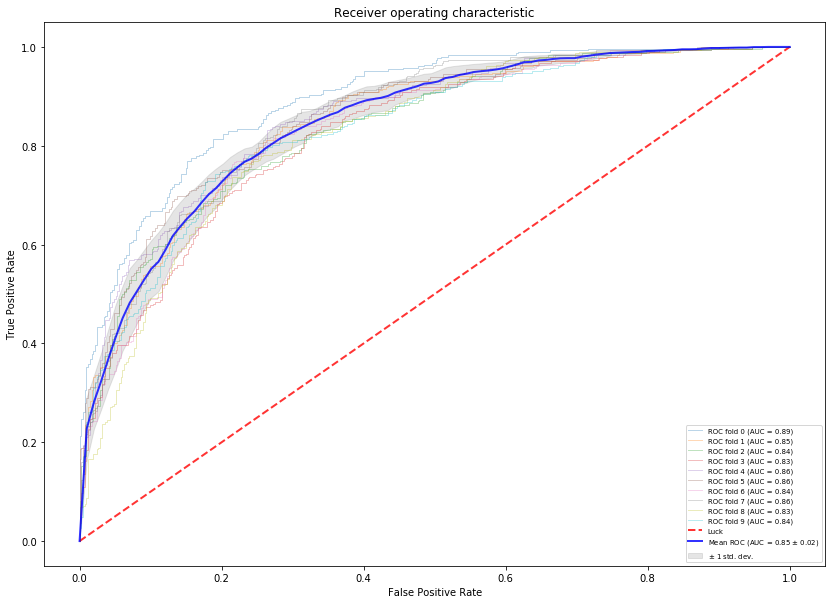

,AUC Train,AUC Test
0,0.999906,0.892869
1,0.999983,0.849606
2,0.999936,0.838925
3,0.999949,0.827271
4,0.999946,0.858915
5,0.999946,0.859511
6,0.999958,0.835898
7,0.999763,0.857472
8,0.999911,0.825623
9,0.999954,0.835820


In [59]:
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right", fontsize = 'x-small')
    plt.show()
    return (f, ax)
def compute_roc_auc(index):
    y_predict = clf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y.iloc[index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score
    
clf = xgboost.XGBClassifier()
n_splits = 10
cv = StratifiedKFold(n_splits=n_splits, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(n_splits)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

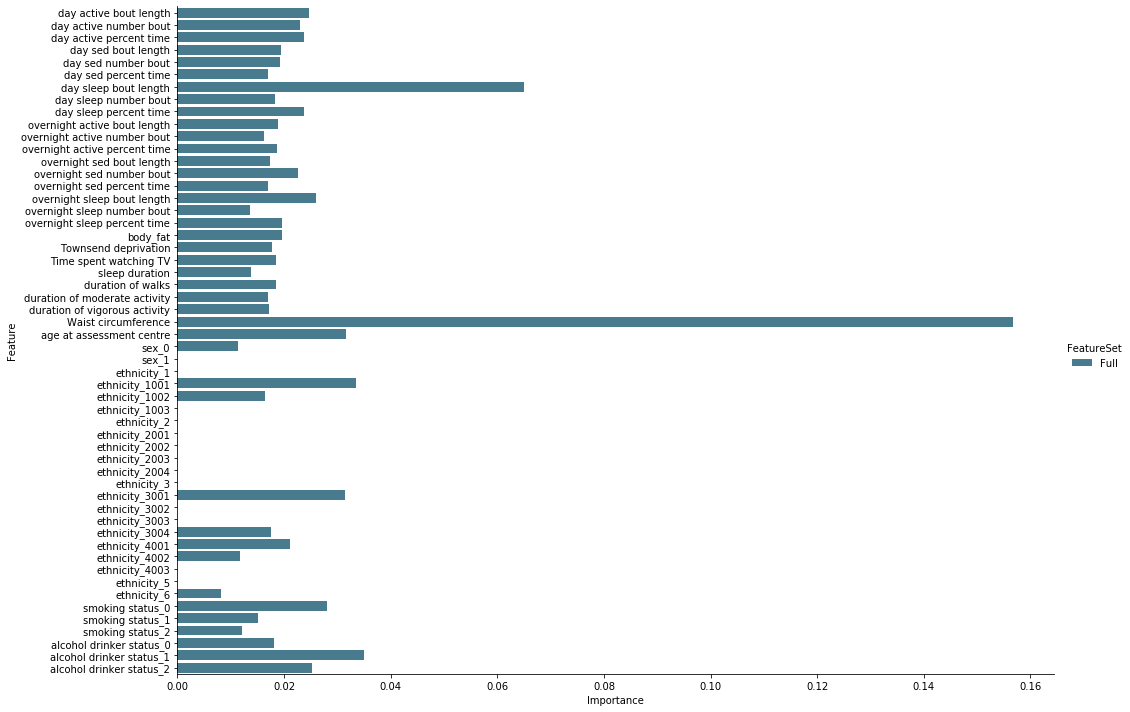

In [60]:
# XG Model Feature Importance
# Importance Extarction
imp = {'Feature': X.columns, 'Importance': clf.feature_importances_, 'FeatureSet': "Full"}
imp_df = pd.DataFrame(data=imp)
sns.catplot(x='Importance', y='Feature', hue='FeatureSet', data=imp_df, kind='bar', aspect=1.5, palette = current_palette, height = 10)

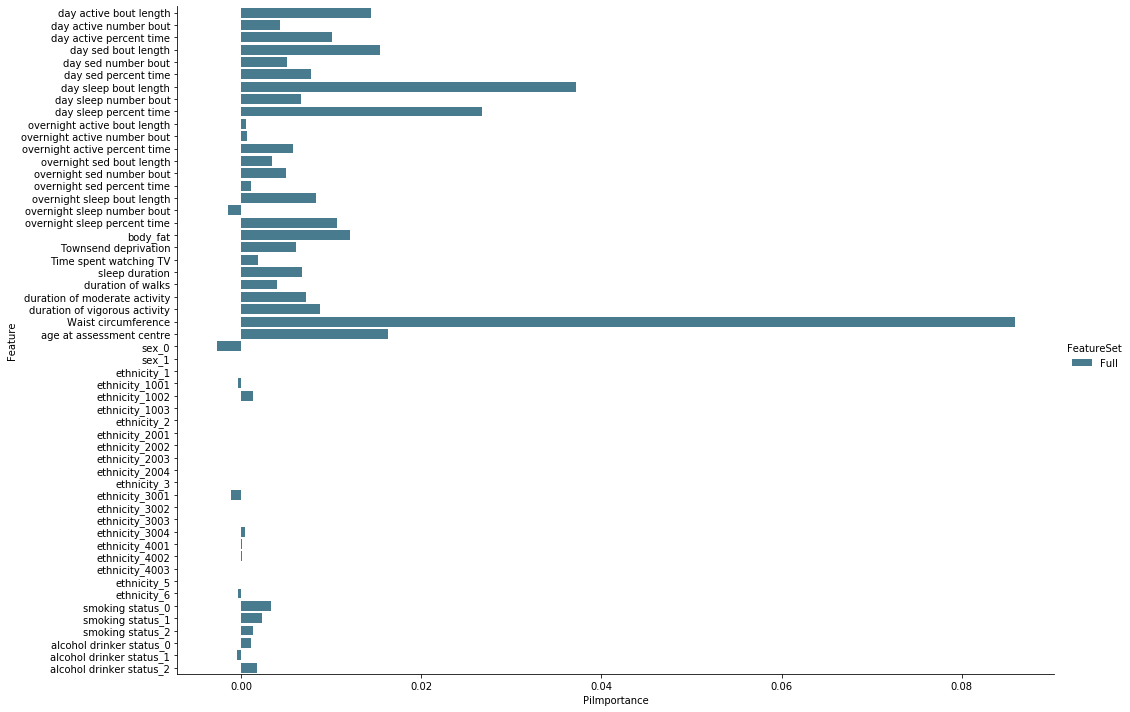

In [61]:
# XG Permutation Importance
pi = permutation_importance(clf, X.iloc[test], y.iloc[test], n_jobs=2, n_repeats=10)
pi_imp = {'Feature': X.columns, 'PiImportance': pi.importances_mean, 'FeatureSet': "Full"}
pi_imp_df = pd.DataFrame(data=pi_imp)
sns.catplot(x='PiImportance', y='Feature', hue='FeatureSet', data=pi_imp_df, kind='bar', aspect=1.5, palette = current_palette, height = 10)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


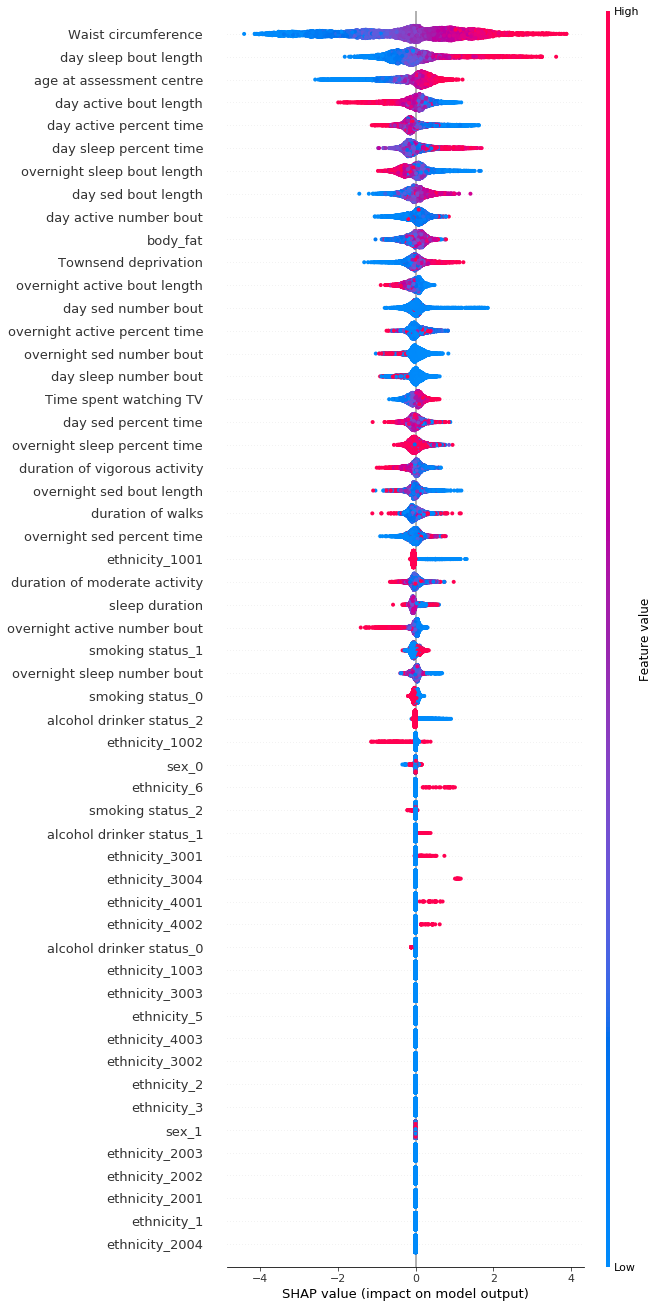

In [62]:
# XG Shap Values
# decode issue workaround
mybooster = clf.get_booster()    
model_bytearray = mybooster.save_raw()[4:]
mybooster.save_raw = changeByteLoc


shap_values = shap.TreeExplainer(mybooster).shap_values(X.iloc[train])
shap.summary_plot(shap_values, X.iloc[train], feature_names=X.columns, max_display=100)

# T2D PREDICTION WITH HLAF ONLY

In [63]:
t2d_half_controls[HLAF_data.columns]

,day active bout length,day active number bout,day active percent time,day sed bout length,day sed number bout,day sed percent time,day sleep bout length,day sleep number bout,day sleep percent time,overnight active bout length,overnight active number bout,overnight active percent time,overnight sed bout length,overnight sed number bout,overnight sed percent time,overnight sleep bout length,overnight sleep number bout,overnight sleep percent time
eid,,,,,,,,,,,,,,,,,,
5332779,1.757972,-0.087783,1.655171,-0.407854,-0.230360,-0.530669,-0.658682,-0.233394,-0.863770,0.007693,-0.152351,-0.264236,-0.461094,-0.226696,-0.421391,1.259153,-0.170015,0.551659
3683565,-0.386310,-0.254152,-0.647720,0.589284,-0.236690,1.305214,-0.514675,-0.234158,-0.559617,3.838223,-0.083750,0.415680,-0.491170,-0.225362,-0.397265,0.853463,-0.167025,0.190716
5104106,0.803320,-0.157003,0.376640,0.524853,-0.235107,0.547353,-0.535340,-0.234158,-0.672617,0.088642,-0.144280,-0.121478,-0.820498,-0.232031,-0.530831,0.913038,-0.170015,0.582908
1361106,-0.693555,-0.198291,-0.170289,-0.362186,-0.209788,0.337146,-0.108416,-0.229575,0.100764,-0.740280,-0.180599,-0.361197,-0.509215,-0.228030,-0.305946,0.240395,-0.161046,0.506212
4608527,0.543879,-0.252938,-0.287603,0.668812,-0.241437,0.735238,-0.443697,-0.240269,-0.247314,-0.808278,-0.180599,-0.410056,0.262225,-0.232031,-0.292457,0.370067,-0.164036,0.510964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019959,-0.638600,-0.388947,-1.517913,1.589891,-0.257261,1.822310,-0.361576,-0.237214,-0.369109,-0.283725,-0.168493,-0.336572,0.505837,-0.225362,0.034286,-0.071670,-0.152077,0.023502
6022001,-0.428033,-0.244437,-0.259534,0.323830,-0.232733,1.106698,-0.747764,-0.242561,-0.821972,-0.963701,-0.188670,-0.433679,-0.139285,-0.236033,-0.472408,1.192780,-0.170015,0.542168
6023926,0.226533,-0.116928,0.688199,-0.123351,-0.224821,-0.252565,-0.234547,-0.246381,-0.046627,-0.555716,-0.172528,-0.345192,-0.731775,-0.229364,-0.491015,-0.872797,-0.155067,0.473437


In [64]:
#T2D Prediction with HLAF ONLY
X = t2d_half_controls[HLAF_data.columns]
X

,day active bout length,day active number bout,day active percent time,day sed bout length,day sed number bout,day sed percent time,day sleep bout length,day sleep number bout,day sleep percent time,overnight active bout length,overnight active number bout,overnight active percent time,overnight sed bout length,overnight sed number bout,overnight sed percent time,overnight sleep bout length,overnight sleep number bout,overnight sleep percent time
eid,,,,,,,,,,,,,,,,,,
5332779,1.757972,-0.087783,1.655171,-0.407854,-0.230360,-0.530669,-0.658682,-0.233394,-0.863770,0.007693,-0.152351,-0.264236,-0.461094,-0.226696,-0.421391,1.259153,-0.170015,0.551659
3683565,-0.386310,-0.254152,-0.647720,0.589284,-0.236690,1.305214,-0.514675,-0.234158,-0.559617,3.838223,-0.083750,0.415680,-0.491170,-0.225362,-0.397265,0.853463,-0.167025,0.190716
5104106,0.803320,-0.157003,0.376640,0.524853,-0.235107,0.547353,-0.535340,-0.234158,-0.672617,0.088642,-0.144280,-0.121478,-0.820498,-0.232031,-0.530831,0.913038,-0.170015,0.582908
1361106,-0.693555,-0.198291,-0.170289,-0.362186,-0.209788,0.337146,-0.108416,-0.229575,0.100764,-0.740280,-0.180599,-0.361197,-0.509215,-0.228030,-0.305946,0.240395,-0.161046,0.506212
4608527,0.543879,-0.252938,-0.287603,0.668812,-0.241437,0.735238,-0.443697,-0.240269,-0.247314,-0.808278,-0.180599,-0.410056,0.262225,-0.232031,-0.292457,0.370067,-0.164036,0.510964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019959,-0.638600,-0.388947,-1.517913,1.589891,-0.257261,1.822310,-0.361576,-0.237214,-0.369109,-0.283725,-0.168493,-0.336572,0.505837,-0.225362,0.034286,-0.071670,-0.152077,0.023502
6022001,-0.428033,-0.244437,-0.259534,0.323830,-0.232733,1.106698,-0.747764,-0.242561,-0.821972,-0.963701,-0.188670,-0.433679,-0.139285,-0.236033,-0.472408,1.192780,-0.170015,0.542168
6023926,0.226533,-0.116928,0.688199,-0.123351,-0.224821,-0.252565,-0.234547,-0.246381,-0.046627,-0.555716,-0.172528,-0.345192,-0.731775,-0.229364,-0.491015,-0.872797,-0.155067,0.473437


## Random Forest

In [65]:
#Random forest
predicted_rf = cross_val_predict(RandomForestClassifier(n_estimators=150, max_depth=20,max_features=15,random_state=0), X, y, cv=10)
print(confusion_matrix(y,predicted_rf))
print(metrics.classification_report(y, predicted_rf))


[[3487  655]
 [1281 1795]]
              precision    recall  f1-score   support

         0.0       0.73      0.84      0.78      4142
         1.0       0.73      0.58      0.65      3076

    accuracy                           0.73      7218
   macro avg       0.73      0.71      0.72      7218
weighted avg       0.73      0.73      0.73      7218



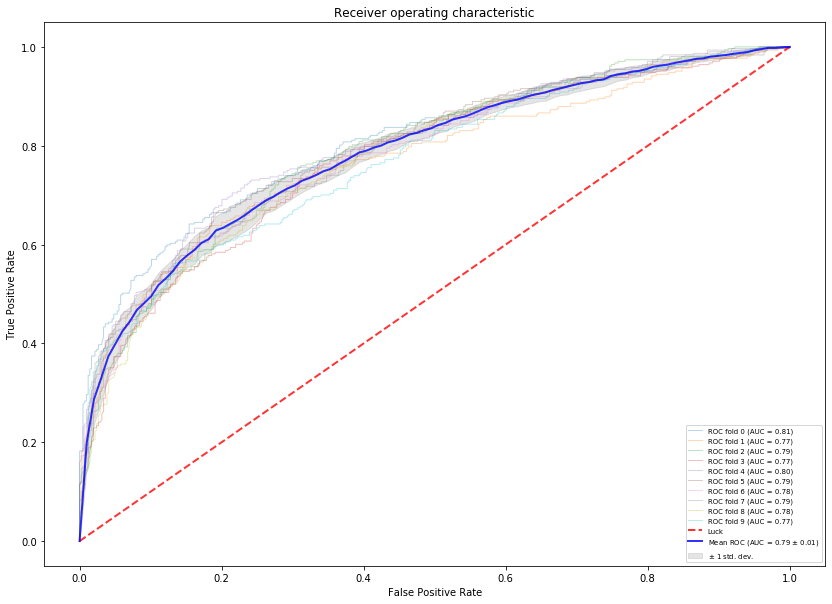

,AUC Train,AUC Test
0,1.0,0.807292
1,1.0,0.772858
2,1.0,0.789647
3,1.0,0.774555
4,1.0,0.802505
5,1.0,0.794223
6,1.0,0.779385
7,1.0,0.789843
8,1.0,0.777015
9,1.0,0.769882


In [66]:
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right", fontsize = 'x-small')
    plt.show()
    return (f, ax)
def compute_roc_auc(index):
    y_predict = clf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y.iloc[index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score
    
clf = RandomForestClassifier(n_estimators=150, max_depth=20,max_features=15,random_state=0)
n_splits = 10
cv = StratifiedKFold(n_splits=n_splits, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(n_splits)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

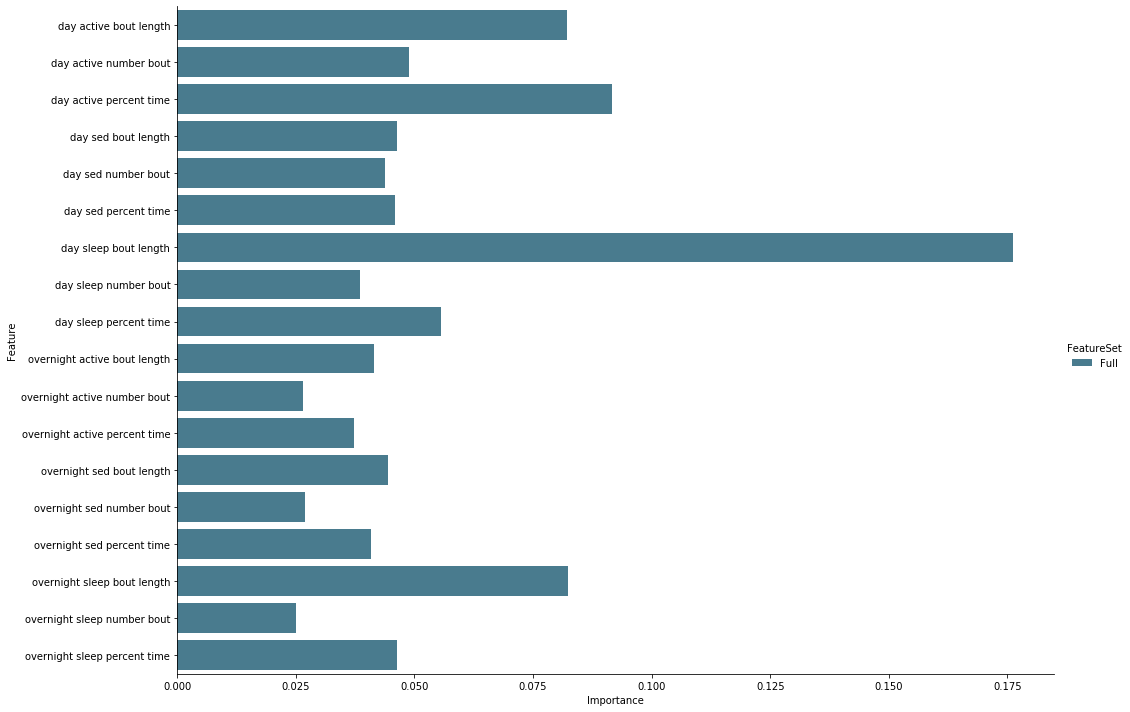

In [67]:
# RF Model Feature Importance
# Importance Extarction
imp = {'Feature': X.columns, 'Importance': clf.feature_importances_, 'FeatureSet': "Full"}
imp_df = pd.DataFrame(data=imp)
sns.catplot(x='Importance', y='Feature', hue='FeatureSet', data=imp_df, kind='bar', aspect=1.5, palette = current_palette, height = 10)

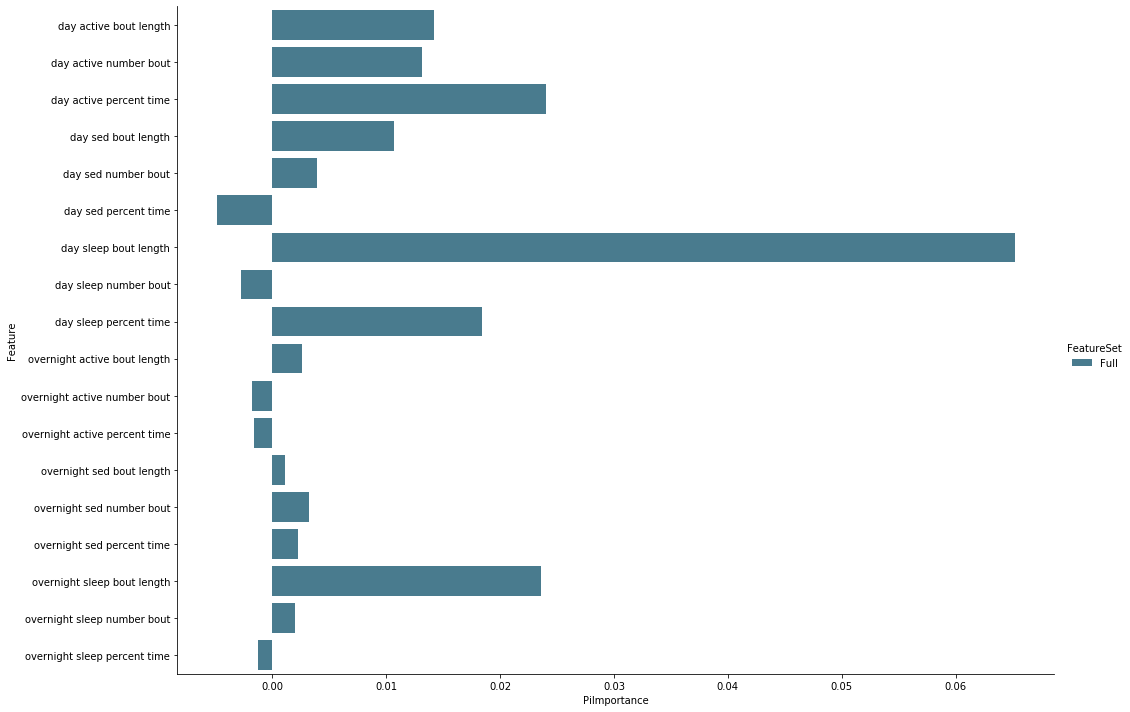

In [68]:
# RF Permutation Importance
pi = permutation_importance(clf, X.iloc[test], y.iloc[test], n_jobs=2, n_repeats=10)
pi_imp = {'Feature': X.columns, 'PiImportance': pi.importances_mean, 'FeatureSet': "Full"}
pi_imp_df = pd.DataFrame(data=pi_imp)
sns.catplot(x='PiImportance', y='Feature', hue='FeatureSet', data=pi_imp_df, kind='bar', aspect=1.5, palette = current_palette, height = 10)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


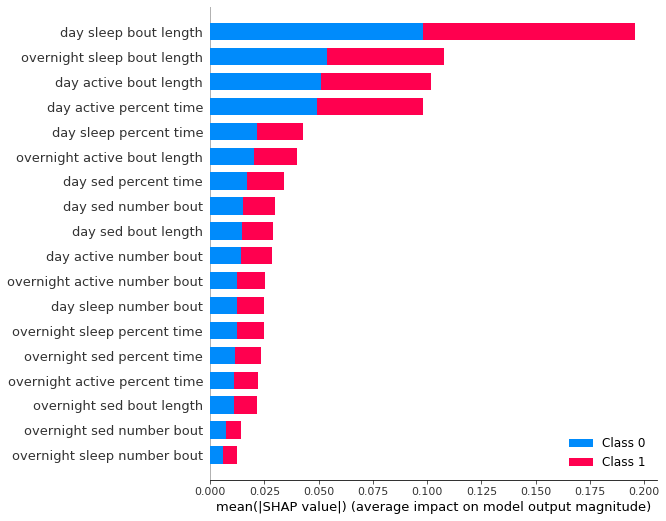

In [69]:
# RF Shap Values
shap_values = shap.TreeExplainer(clf).shap_values(X.iloc[train])
shap.summary_plot(shap_values, X.iloc[train], feature_names=X.columns, max_display=100)

## Logistic Regression

In [70]:
#Logistic Regression 

predicted_logit = cross_val_predict(LogisticRegression(multi_class="multinomial", solver='lbfgs', max_iter = 2000), X, y, cv=10)
print(confusion_matrix(y, predicted_logit))
print(metrics.classification_report(y, predicted_logit))

[[3393  749]
 [1188 1888]]
              precision    recall  f1-score   support

         0.0       0.74      0.82      0.78      4142
         1.0       0.72      0.61      0.66      3076

    accuracy                           0.73      7218
   macro avg       0.73      0.72      0.72      7218
weighted avg       0.73      0.73      0.73      7218



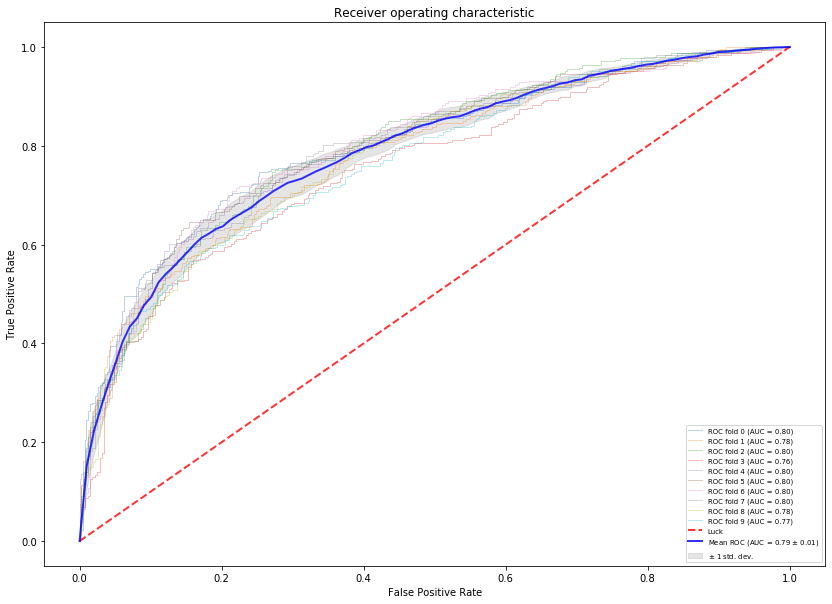

,AUC Train,AUC Test
0,0.789583,0.803116
1,0.791651,0.783360
2,0.790151,0.798772
3,0.794129,0.757623
4,0.790152,0.797086
5,0.789665,0.799368
6,0.789741,0.799784
7,0.790033,0.797486
8,0.792213,0.777534
9,0.793137,0.770791


In [71]:
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right", fontsize = 'x-small')
    plt.show()
    return (f, ax)
def compute_roc_auc(index):
    y_predict = clf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y.iloc[index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score
    
clf = LogisticRegression(multi_class="multinomial", solver='lbfgs')
n_splits = 10
cv = StratifiedKFold(n_splits=n_splits, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(n_splits)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

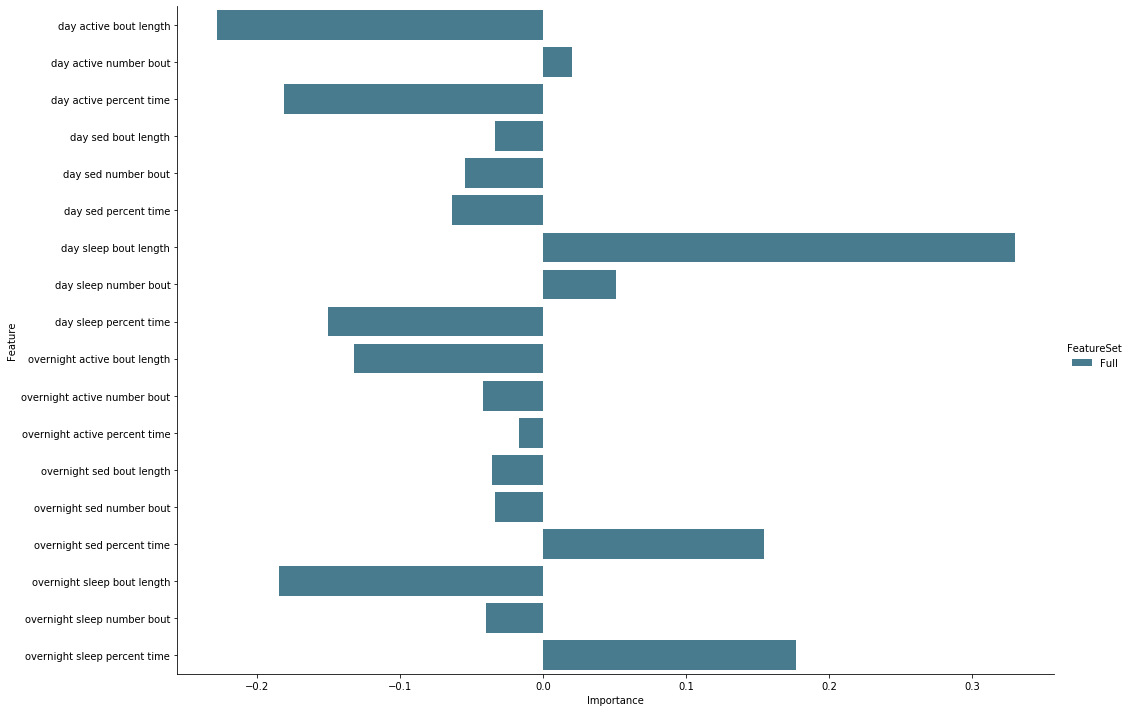

In [72]:
# LR Model Feature Importance
# Importance Extarction
imp = {'Feature': X.columns, 'Importance': clf.coef_[0], 'FeatureSet': "Full"}
imp_df = pd.DataFrame(data=imp)
sns.catplot(x='Importance', y='Feature', hue='FeatureSet', data=imp_df, kind='bar', aspect=1.5, palette = current_palette, height = 10)

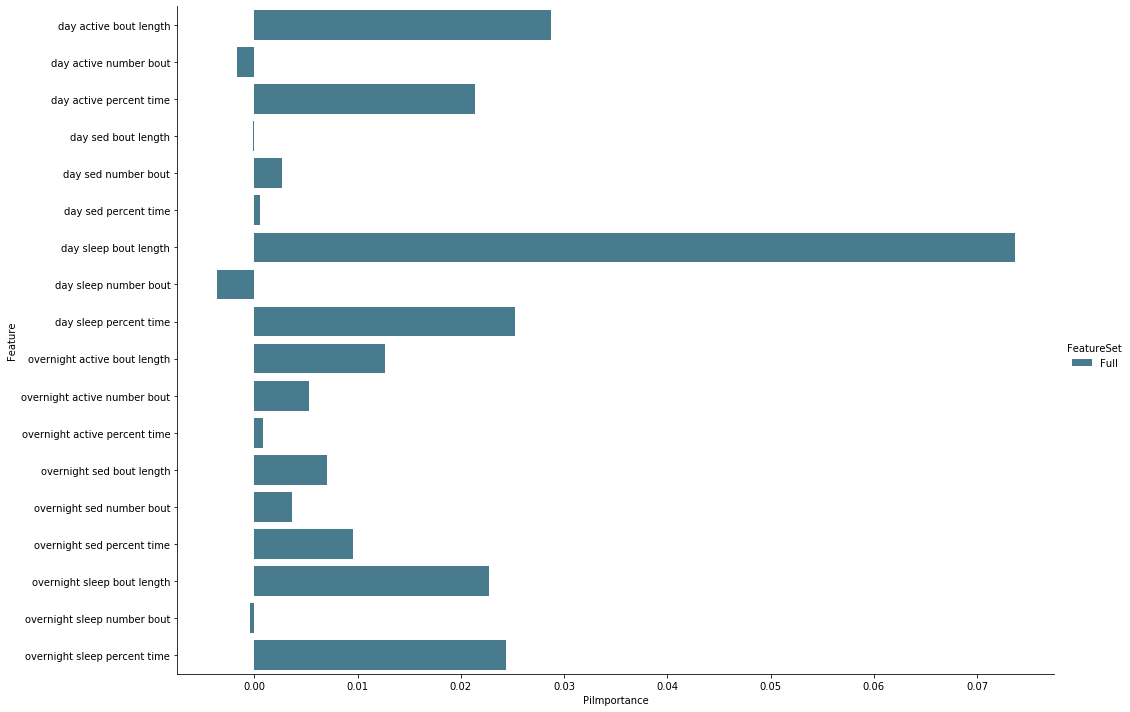

In [73]:
# LR Permutation Importance
pi = permutation_importance(clf, X.iloc[test], y.iloc[test], n_jobs=2, n_repeats=10)
pi_imp = {'Feature': X.columns, 'PiImportance': pi.importances_mean, 'FeatureSet': "Full"}
pi_imp_df = pd.DataFrame(data=pi_imp)
sns.catplot(x='PiImportance', y='Feature', hue='FeatureSet', data=pi_imp_df, kind='bar', aspect=1.5, palette = current_palette, height = 10)

The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!


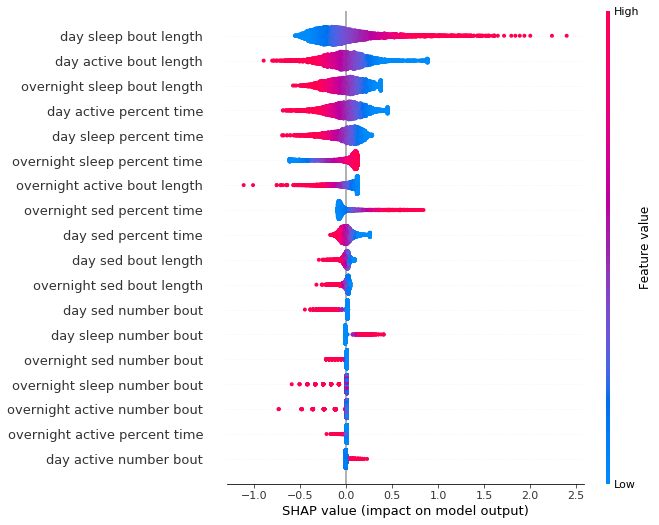

In [74]:
# LR Shap Values
shap_values = shap.LinearExplainer(clf, X.iloc[train], feature_perturbation="independent").shap_values(X.iloc[train])
shap.summary_plot(shap_values, X.iloc[train], feature_names=X.columns, max_display=100)

## XGBoost

In [75]:
#XGBoost 

import xgboost
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


# CV model
model = xgboost.XGBClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=7)
predicted_xgboost = cross_val_predict(model, X, y, cv=kfold)
print(confusion_matrix(y, predicted_xgboost))
print(metrics.classification_report(y, predicted_xgboost))

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


[[3311  831]
 [1236 1840]]
              precision    recall  f1-score   support

         0.0       0.73      0.80      0.76      4142
         1.0       0.69      0.60      0.64      3076

    accuracy                           0.71      7218
   macro avg       0.71      0.70      0.70      7218
weighted avg       0.71      0.71      0.71      7218



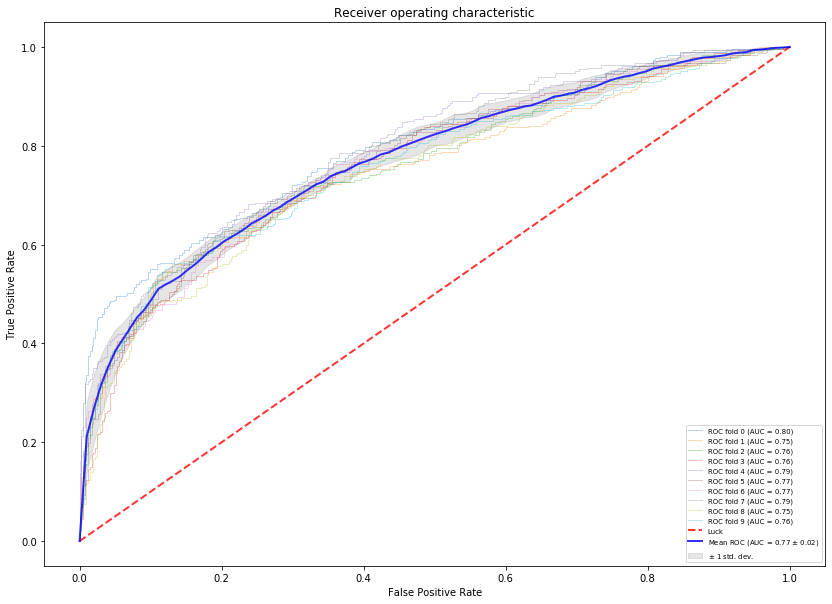

,AUC Train,AUC Test
0,0.997657,0.795597
1,0.998412,0.754280
2,0.998334,0.762187
3,0.997973,0.761183
4,0.997837,0.793251
5,0.997366,0.773292
6,0.997410,0.771018
7,0.997500,0.788357
8,0.999208,0.748446
9,0.998535,0.760626


In [76]:
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right", fontsize = 'x-small')
    plt.show()
    return (f, ax)
def compute_roc_auc(index):
    y_predict = clf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y.iloc[index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score
    
clf = xgboost.XGBClassifier()
n_splits = 10
cv = StratifiedKFold(n_splits=n_splits, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(n_splits)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

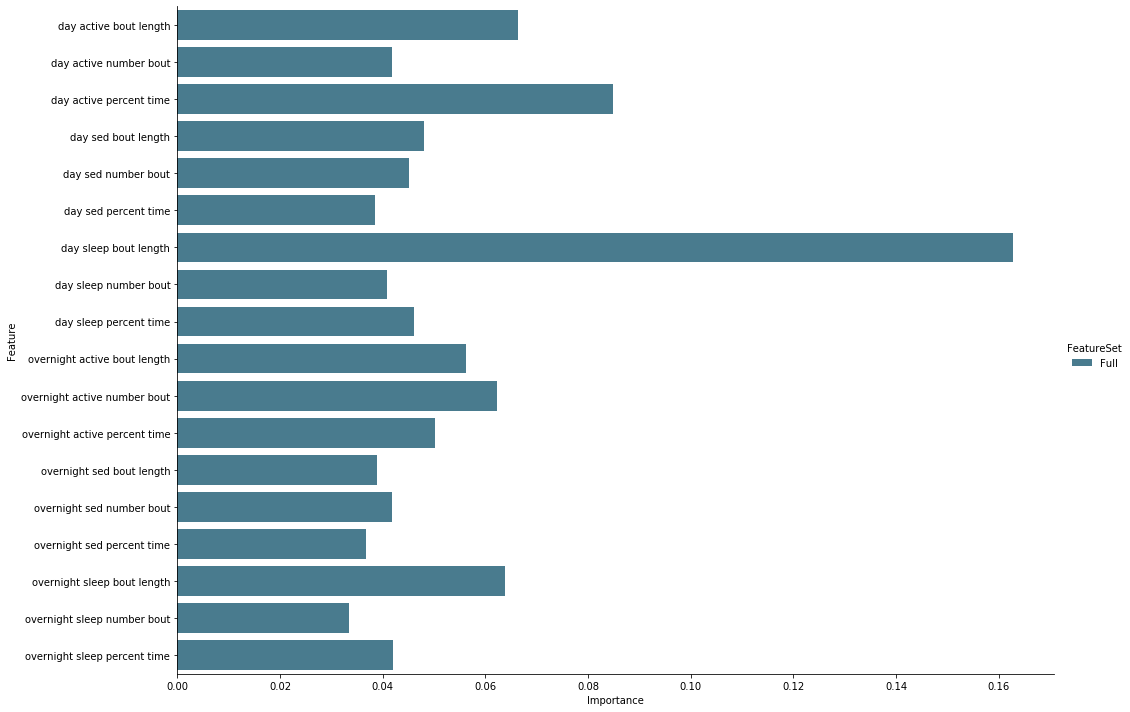

In [77]:
# XG Model Feature Importance
# Importance Extarction
imp = {'Feature': X.columns, 'Importance': clf.feature_importances_, 'FeatureSet': "Full"}
imp_df = pd.DataFrame(data=imp)
sns.catplot(x='Importance', y='Feature', hue='FeatureSet', data=imp_df, kind='bar', aspect=1.5, palette = current_palette, height = 10)

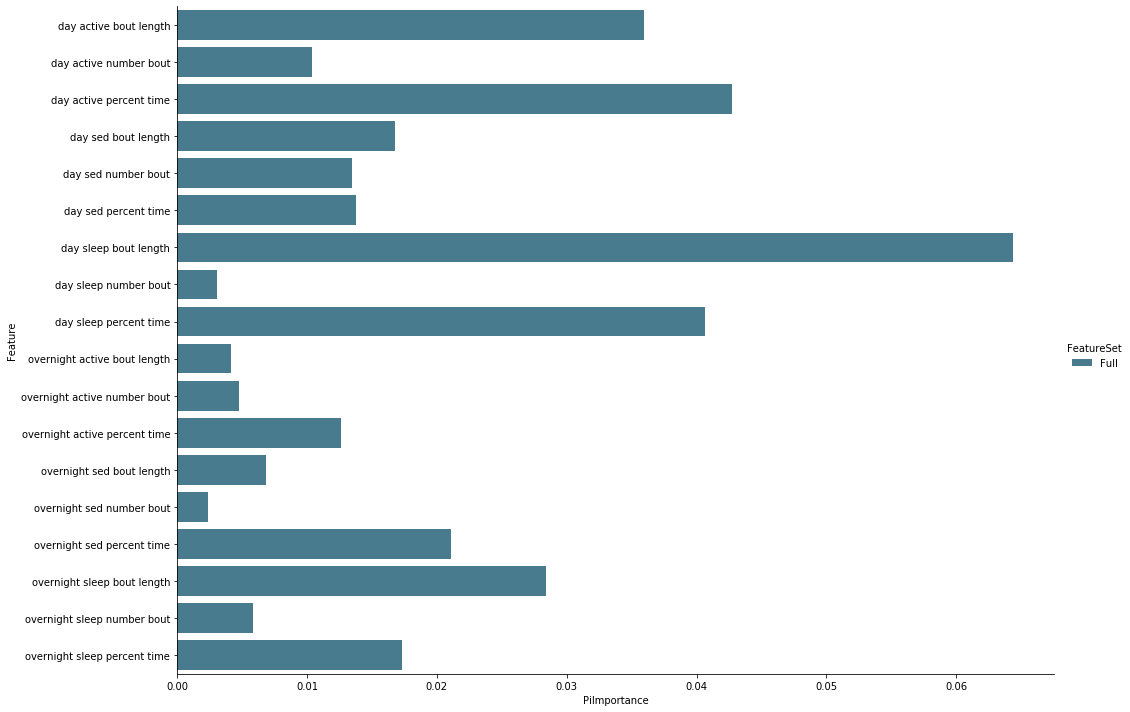

In [78]:
# XG Permutation Importance
pi = permutation_importance(clf, X.iloc[test], y.iloc[test], n_jobs=2, n_repeats=10)
pi_imp = {'Feature': X.columns, 'PiImportance': pi.importances_mean, 'FeatureSet': "Full"}
pi_imp_df = pd.DataFrame(data=pi_imp)
sns.catplot(x='PiImportance', y='Feature', hue='FeatureSet', data=pi_imp_df, kind='bar', aspect=1.5, palette = current_palette, height = 10)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


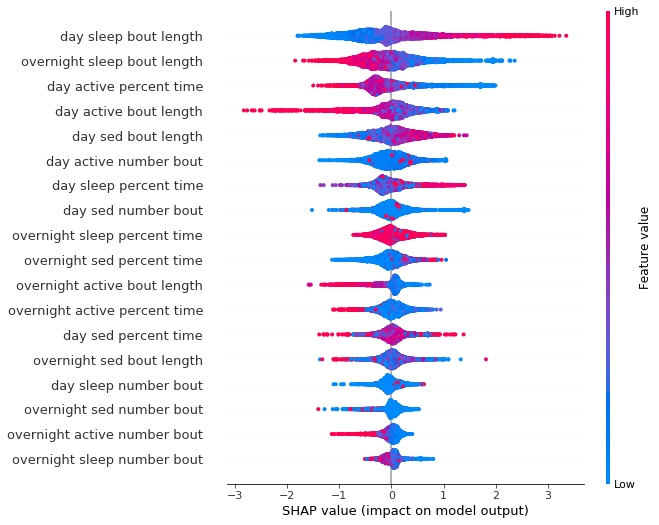

In [79]:
# XG Shap Values
# decode issue workaround
mybooster = clf.get_booster()    
model_bytearray = mybooster.save_raw()[4:]
mybooster.save_raw = changeByteLoc


shap_values = shap.TreeExplainer(mybooster).shap_values(X.iloc[train])
shap.summary_plot(shap_values, X.iloc[train], feature_names=X.columns, max_display=100)

# T2D PREDICTION WITH SDL ONLY

In [80]:
SDL_only_df = selected_ukbb.drop(['ethnicity','sex','alcohol drinker status','smoking status','HEALTHY_CVD_T2D1_T2D2'], axis=1)
SDL_only = list(SDL_only_df.columns)
SDL_only.extend(ukbb_vars_categorical_encoded.columns)

In [81]:
for i in SDL_only:
    print(i)

body_fat
Townsend deprivation
Time spent watching TV
sleep duration
duration of walks
duration of moderate activity
duration of vigorous activity
Waist circumference
age at assessment centre
sex_0
sex_1
ethnicity_1
ethnicity_1001
ethnicity_1002
ethnicity_1003
ethnicity_2
ethnicity_2001
ethnicity_2002
ethnicity_2003
ethnicity_2004
ethnicity_3
ethnicity_3001
ethnicity_3002
ethnicity_3003
ethnicity_3004
ethnicity_4001
ethnicity_4002
ethnicity_4003
ethnicity_5
ethnicity_6
smoking status_0
smoking status_1
smoking status_2
alcohol drinker status_0
alcohol drinker status_1
alcohol drinker status_2


In [82]:
#T2D Prediction with SDL ONLY

X = t2d_half_controls[SDL_only]
X

,body_fat,Townsend deprivation,Time spent watching TV,sleep duration,duration of walks,duration of moderate activity,duration of vigorous activity,Waist circumference,age at assessment centre,sex_0,...,ethnicity_4002,ethnicity_4003,ethnicity_5,ethnicity_6,smoking status_0,smoking status_1,smoking status_2,alcohol drinker status_0,alcohol drinker status_1,alcohol drinker status_2
eid,,,,,,,,,,,,,,,,,,,,,
5332779,-0.222003,-0.048042,2.144202,-1.147977,4.158997,1.636588,0.192550,-0.063356,-0.418297,0,...,0,0,0,0,0,1,0,0,0,1
3683565,-1.021359,-1.068492,0.221744,-0.165155,-0.478920,-0.617781,-0.041042,-0.267537,-1.328195,0,...,0,0,0,0,1,0,0,0,0,1
5104106,-2.185127,1.641084,-1.059896,-1.147977,-0.633517,-0.384571,-0.240380,-0.607839,-0.028340,0,...,0,0,0,0,1,0,0,0,0,1
1361106,-0.174982,-1.004556,-0.419076,-0.165155,-0.633517,-0.540044,0.625479,0.072764,-0.158326,0,...,0,0,0,0,0,0,1,0,0,1
4608527,-0.927317,-0.509397,0.862563,0.817667,-0.324323,-0.540044,0.625479,0.072764,1.271514,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6019959,0.683150,0.951657,-0.419076,-2.130799,-0.556219,-0.663235,-0.459228,2.454876,-0.028340,0,...,0,0,0,0,0,1,0,0,0,1
6022001,-0.080940,-0.644459,0.862563,-0.165155,0.139469,0.081850,0.263196,0.208885,-0.678268,0,...,0,0,0,0,0,1,0,0,0,1
6023926,0.024857,0.107670,0.862563,-0.165155,-0.803574,-0.629854,-1.135102,0.957549,0.491602,0,...,0,0,0,0,0,1,0,0,0,1


## Random Forest

In [83]:
#Random forest
predicted_rf = cross_val_predict(RandomForestClassifier(n_estimators=150, max_depth=20,max_features=15,random_state=0), X, y, cv=10)
print(confusion_matrix(y,predicted_rf))
print(metrics.classification_report(y, predicted_rf))


[[3220  922]
 [ 989 2087]]
              precision    recall  f1-score   support

         0.0       0.77      0.78      0.77      4142
         1.0       0.69      0.68      0.69      3076

    accuracy                           0.74      7218
   macro avg       0.73      0.73      0.73      7218
weighted avg       0.73      0.74      0.73      7218



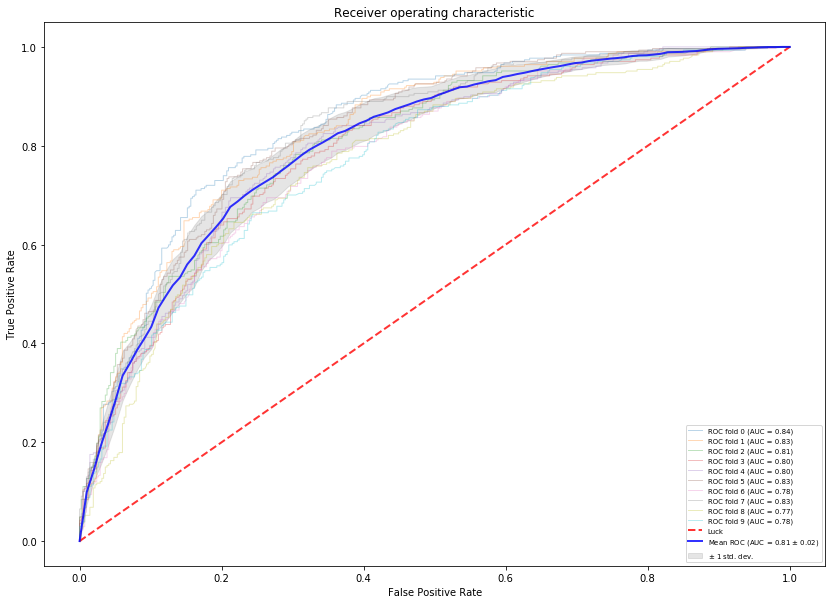

,AUC Train,AUC Test
0,1.0,0.841148
1,1.0,0.830627
2,1.0,0.809422
3,1.0,0.795113
4,1.0,0.799486
5,1.0,0.829534
6,1.0,0.781130
7,1.0,0.827271
8,1.0,0.772317
9,1.0,0.775362


In [84]:
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right", fontsize = 'x-small')
    plt.show()
    return (f, ax)
def compute_roc_auc(index):
    y_predict = clf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y.iloc[index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score
    
clf = RandomForestClassifier(n_estimators=150, max_depth=20,max_features=15,random_state=0)
n_splits = 10
cv = StratifiedKFold(n_splits=n_splits, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(n_splits)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

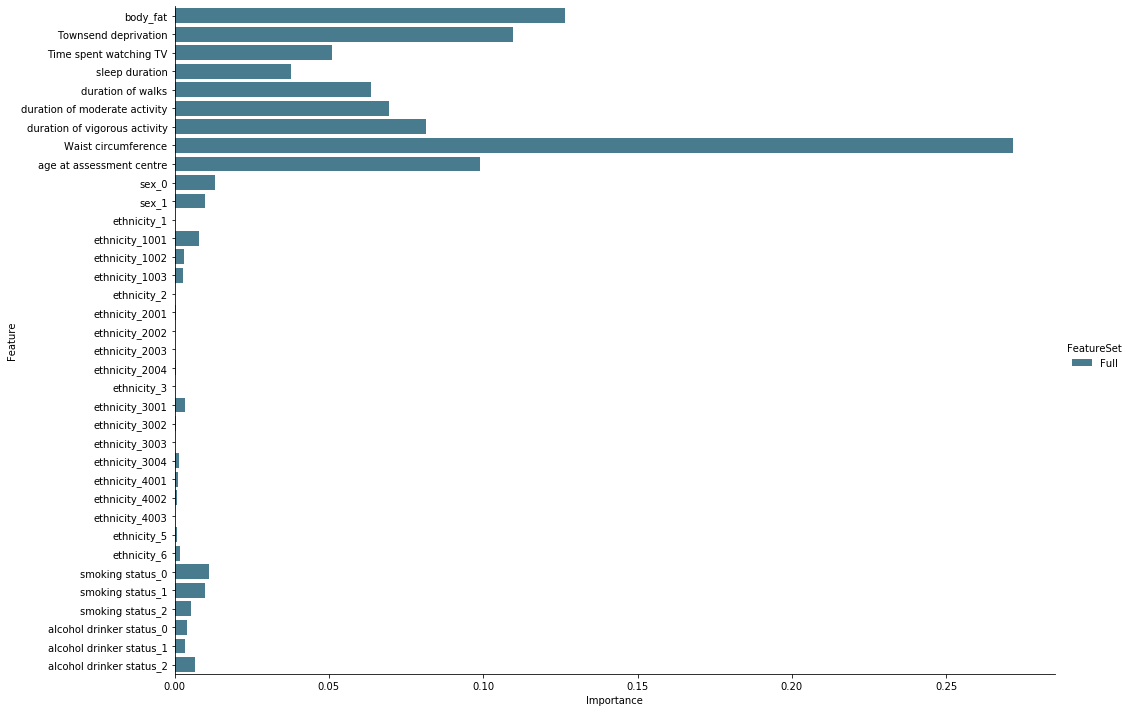

In [85]:
# RF Model Feature Importance
# Importance Extarction
imp = {'Feature': X.columns, 'Importance': clf.feature_importances_, 'FeatureSet': "Full"}
imp_df = pd.DataFrame(data=imp)
sns.catplot(x='Importance', y='Feature', hue='FeatureSet', data=imp_df, kind='bar', aspect=1.5, palette = current_palette, height = 10)

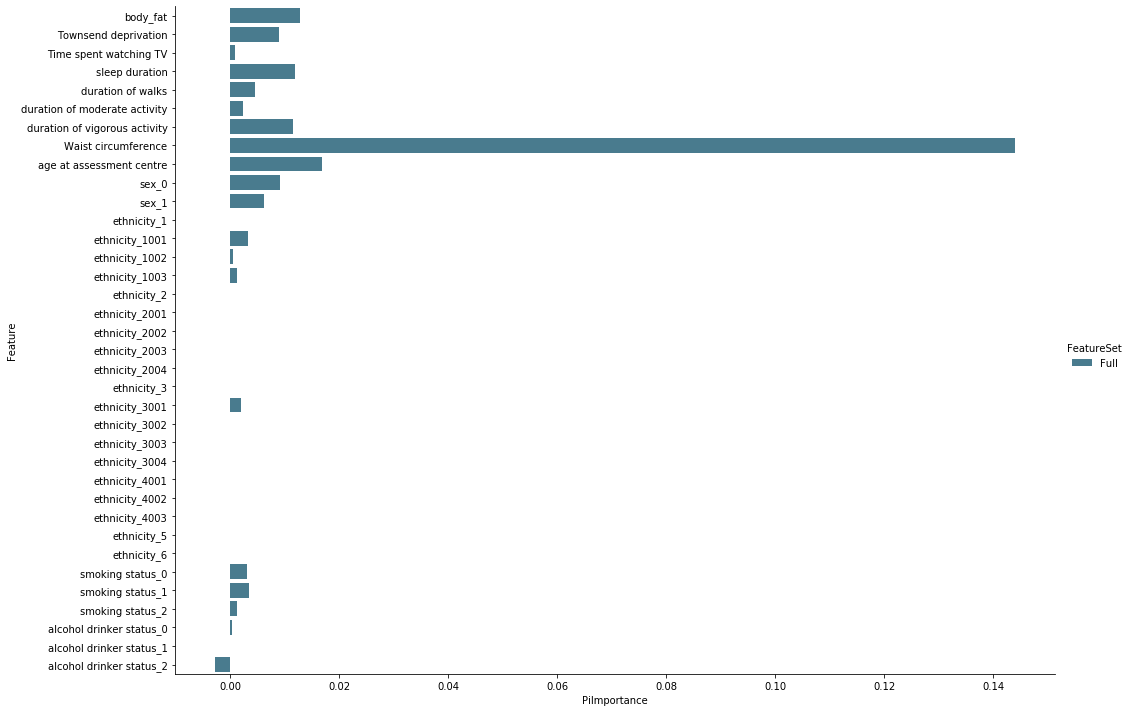

In [86]:
# RF Permutation Importance
pi = permutation_importance(clf, X.iloc[test], y.iloc[test], n_jobs=2, n_repeats=10)
pi_imp = {'Feature': X.columns, 'PiImportance': pi.importances_mean, 'FeatureSet': "Full"}
pi_imp_df = pd.DataFrame(data=pi_imp)
sns.catplot(x='PiImportance', y='Feature', hue='FeatureSet', data=pi_imp_df, kind='bar', aspect=1.5, palette = current_palette, height = 10)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


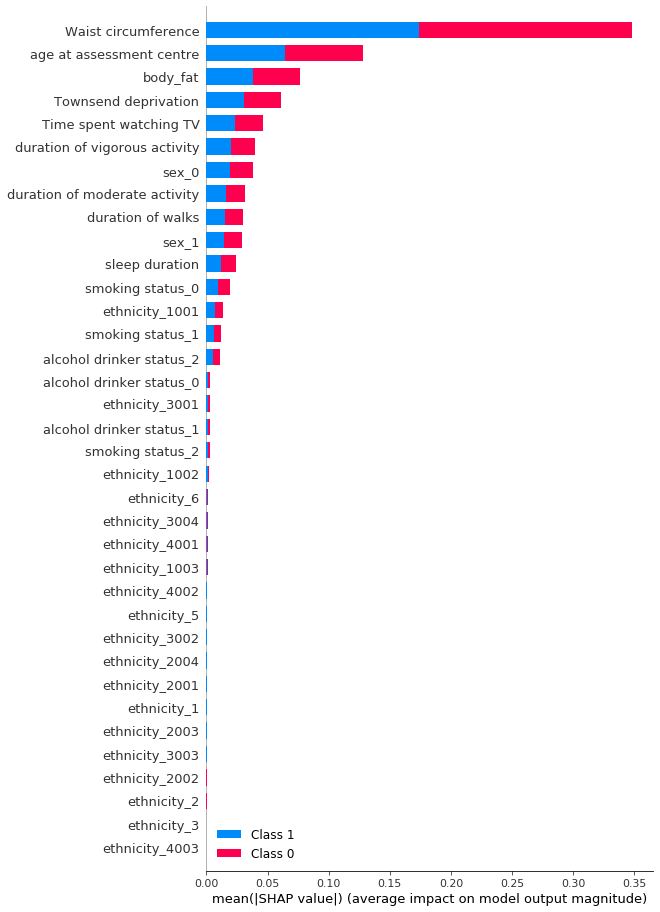

In [87]:
# RF Shap Values
shap_values = shap.TreeExplainer(clf).shap_values(X.iloc[train])
shap.summary_plot(shap_values, X.iloc[train], feature_names=X.columns, max_display=100)

## Logistic Regression

In [88]:
#Logistic Regression 

predicted_logit = cross_val_predict(LogisticRegression(multi_class="multinomial", solver='lbfgs', max_iter = 2000), X, y, cv=10)
print(confusion_matrix(y, predicted_logit))
print(metrics.classification_report(y, predicted_logit))

[[3320  822]
 [1056 2020]]
              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78      4142
         1.0       0.71      0.66      0.68      3076

    accuracy                           0.74      7218
   macro avg       0.73      0.73      0.73      7218
weighted avg       0.74      0.74      0.74      7218



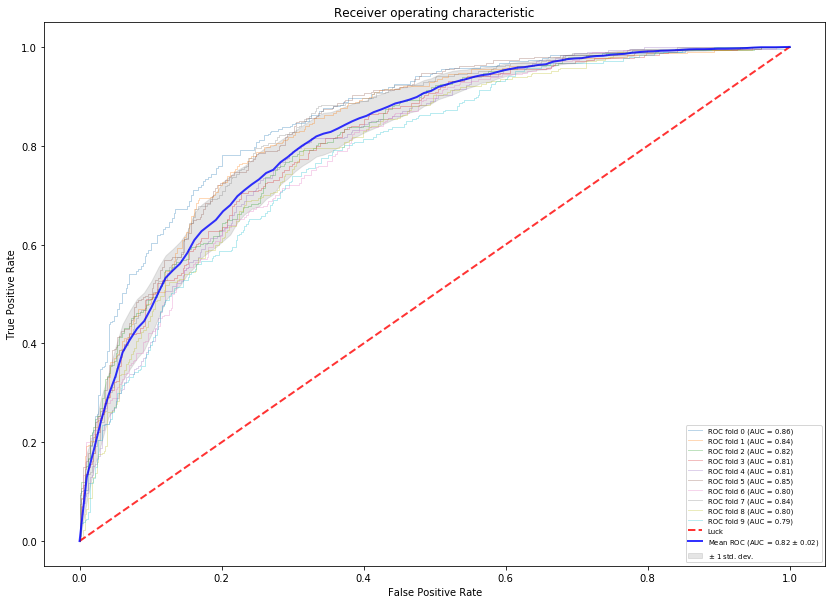

,AUC Train,AUC Test
0,0.819258,0.859723
1,0.821699,0.838491
2,0.824009,0.818770
3,0.824715,0.813398
4,0.825293,0.807344
5,0.820826,0.845411
6,0.826058,0.799344
7,0.821495,0.840305
8,0.826319,0.798565
9,0.827813,0.785638


In [89]:
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right", fontsize = 'x-small')
    plt.show()
    return (f, ax)
def compute_roc_auc(index):
    y_predict = clf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y.iloc[index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score
    
clf = LogisticRegression(multi_class="multinomial", solver='lbfgs', max_iter = 2000)
n_splits = 10
cv = StratifiedKFold(n_splits=n_splits, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(n_splits)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

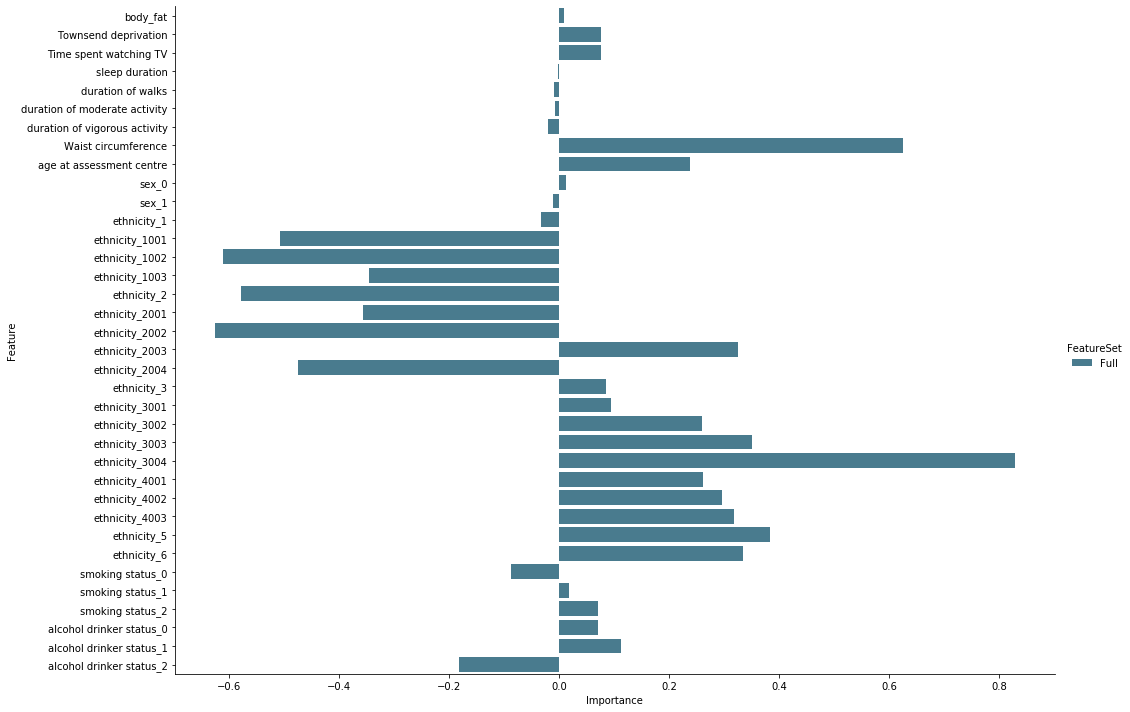

In [90]:
# LR Model Feature Importance
# Importance Extarction
imp = {'Feature': X.columns, 'Importance': clf.coef_[0], 'FeatureSet': "Full"}
imp_df = pd.DataFrame(data=imp)
sns.catplot(x='Importance', y='Feature', hue='FeatureSet', data=imp_df, kind='bar', aspect=1.5, palette = current_palette, height = 10)

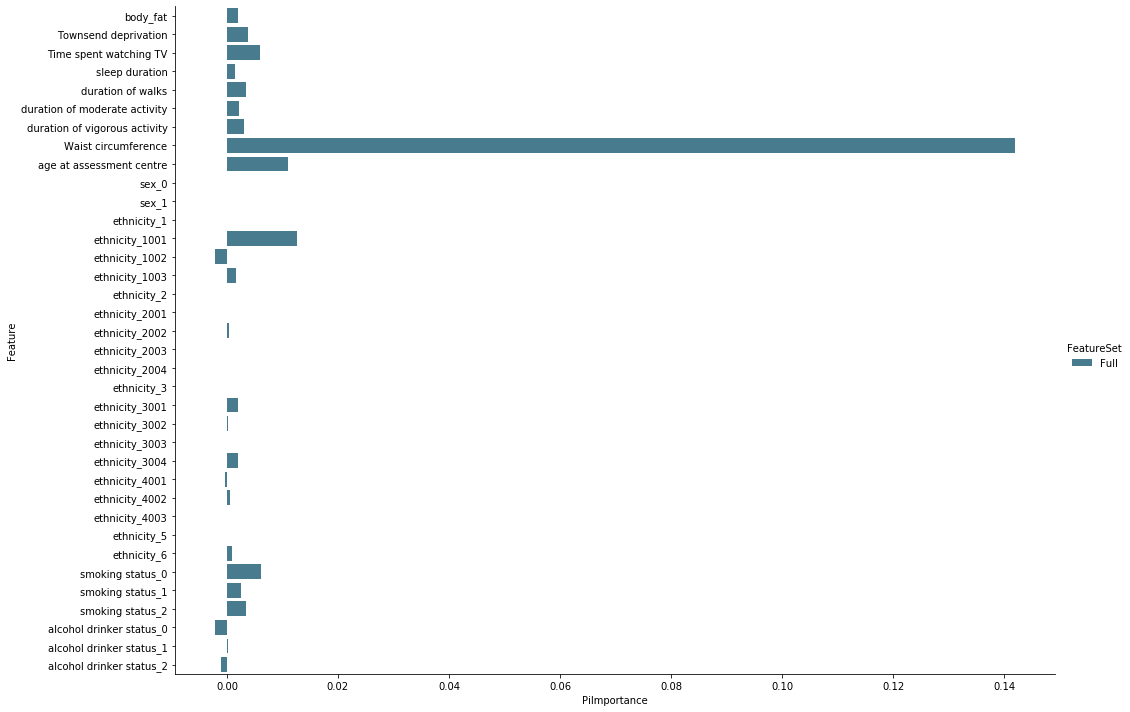

In [91]:
# LR Permutation Importance
pi = permutation_importance(clf, X.iloc[test], y.iloc[test], n_jobs=2, n_repeats=10)
pi_imp = {'Feature': X.columns, 'PiImportance': pi.importances_mean, 'FeatureSet': "Full"}
pi_imp_df = pd.DataFrame(data=pi_imp)
sns.catplot(x='PiImportance', y='Feature', hue='FeatureSet', data=pi_imp_df, kind='bar', aspect=1.5, palette = current_palette, height = 10)

The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!


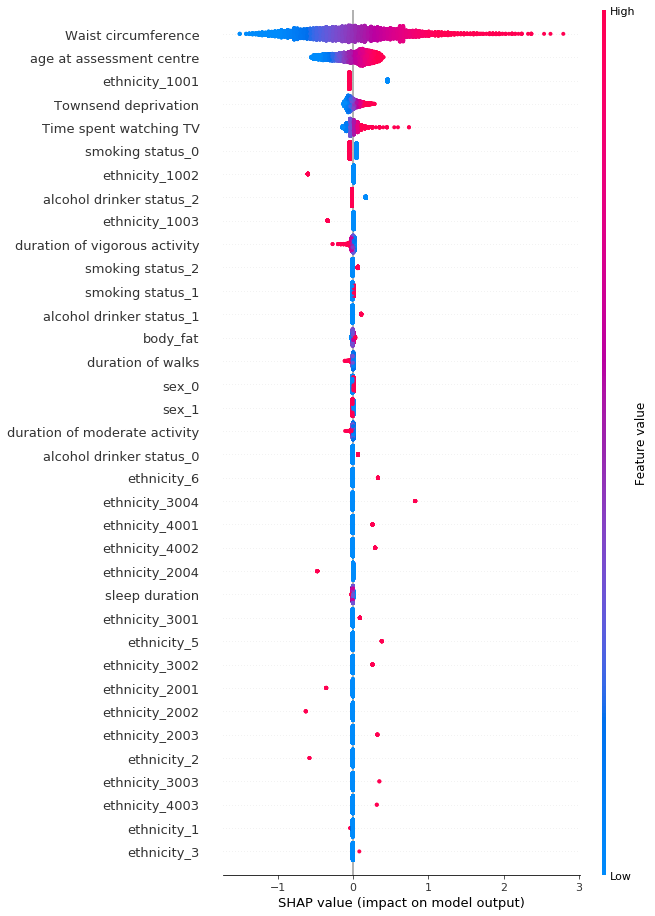

In [92]:
# LR Shap Values
shap_values = shap.LinearExplainer(clf, X.iloc[train], feature_perturbation="independent").shap_values(X.iloc[train])
shap.summary_plot(shap_values, X.iloc[train], feature_names=X.columns, max_display=100)

## XGBoost

In [93]:
#XGBoost

import xgboost
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


# CV model
model = xgboost.XGBClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=7)
predicted_xgboost = cross_val_predict(model, X, y, cv=kfold)
print(confusion_matrix(y, predicted_xgboost))
print(metrics.classification_report(y, predicted_xgboost))

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.


[[3173  969]
 [1050 2026]]
              precision    recall  f1-score   support

         0.0       0.75      0.77      0.76      4142
         1.0       0.68      0.66      0.67      3076

    accuracy                           0.72      7218
   macro avg       0.71      0.71      0.71      7218
weighted avg       0.72      0.72      0.72      7218



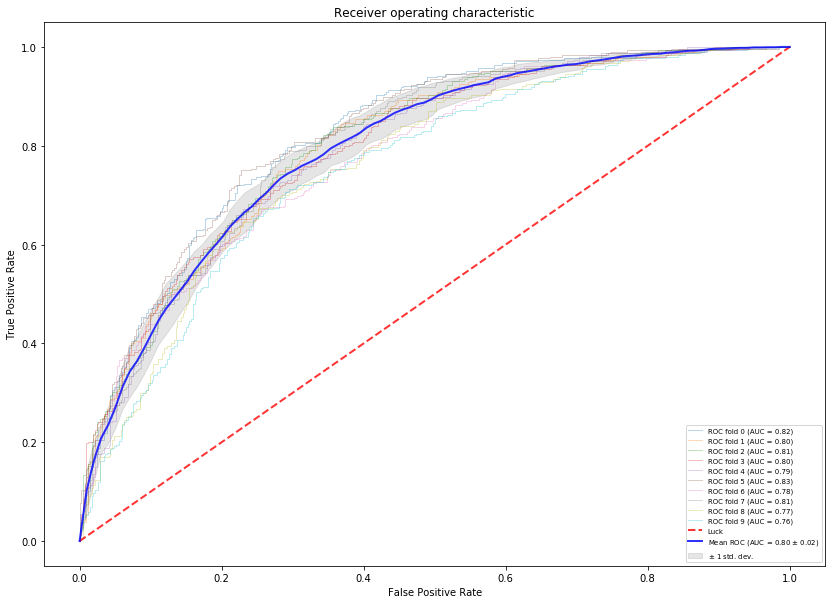

,AUC Train,AUC Test
0,0.987721,0.823366
1,0.988830,0.803391
2,0.988755,0.805956
3,0.985540,0.799352
4,0.987231,0.794098
5,0.987420,0.827130
6,0.986226,0.780758
7,0.986845,0.805407
8,0.988658,0.768659
9,0.987128,0.757880


In [94]:
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_roc_curve(fprs, tprs):
    """Plot the Receiver Operating Characteristic from a list
    of true positive rates and false positive rates."""
    
    # Initialize useful lists + the plot axes.
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(14,10))
    
    # Plot ROC for each K-Fold + compute AUC scores.
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
    # Plot the luck line.
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
    
    # Plot the mean ROC.
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    
    # Plot the standard deviation around the mean ROC.
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')
    
    # Fine tune and show the plot.
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic')
    ax.legend(loc="lower right", fontsize = 'x-small')
    plt.show()
    return (f, ax)
def compute_roc_auc(index):
    y_predict = clf.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y.iloc[index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score
    
clf = xgboost.XGBClassifier()
n_splits = 10
cv = StratifiedKFold(n_splits=n_splits, random_state=123, shuffle=True)
results = pd.DataFrame(columns=['training_score', 'test_score'])
fprs, tprs, scores = [], [], []
    
for (train, test), i in zip(cv.split(X, y), range(n_splits)):
    clf.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

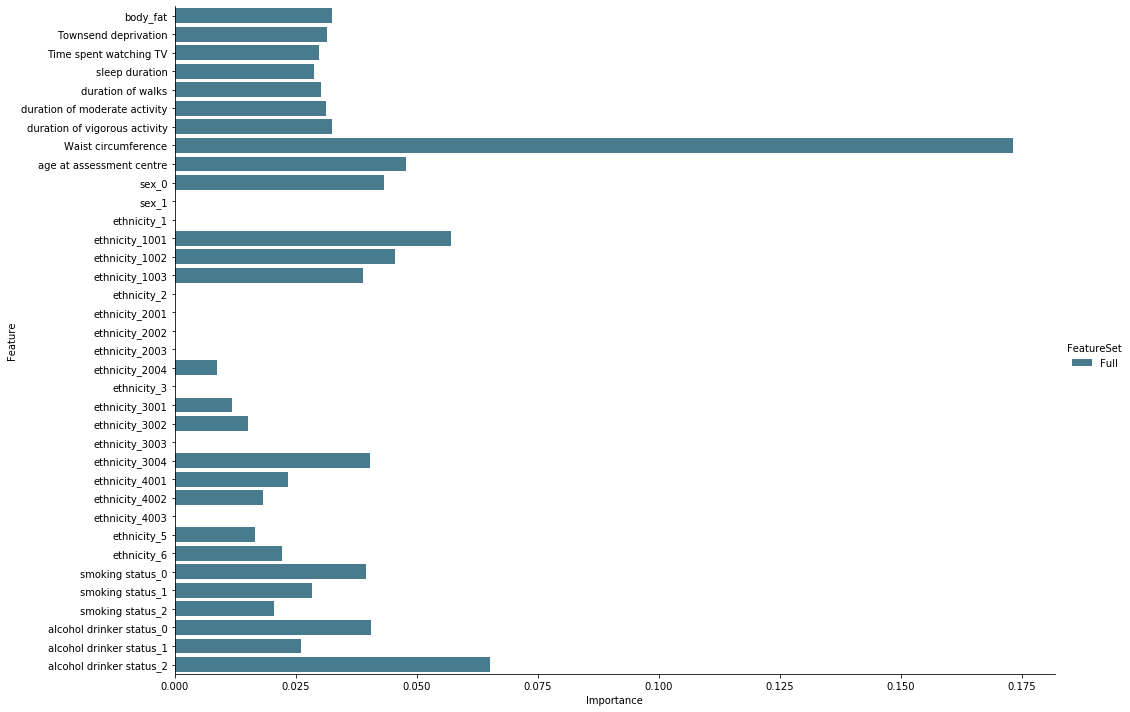

In [95]:
# XG Model Feature Importance
# Importance Extarction
imp = {'Feature': X.columns, 'Importance': clf.feature_importances_, 'FeatureSet': "Full"}
imp_df = pd.DataFrame(data=imp)
sns.catplot(x='Importance', y='Feature', hue='FeatureSet', data=imp_df, kind='bar', aspect=1.5, palette = current_palette, height = 10)

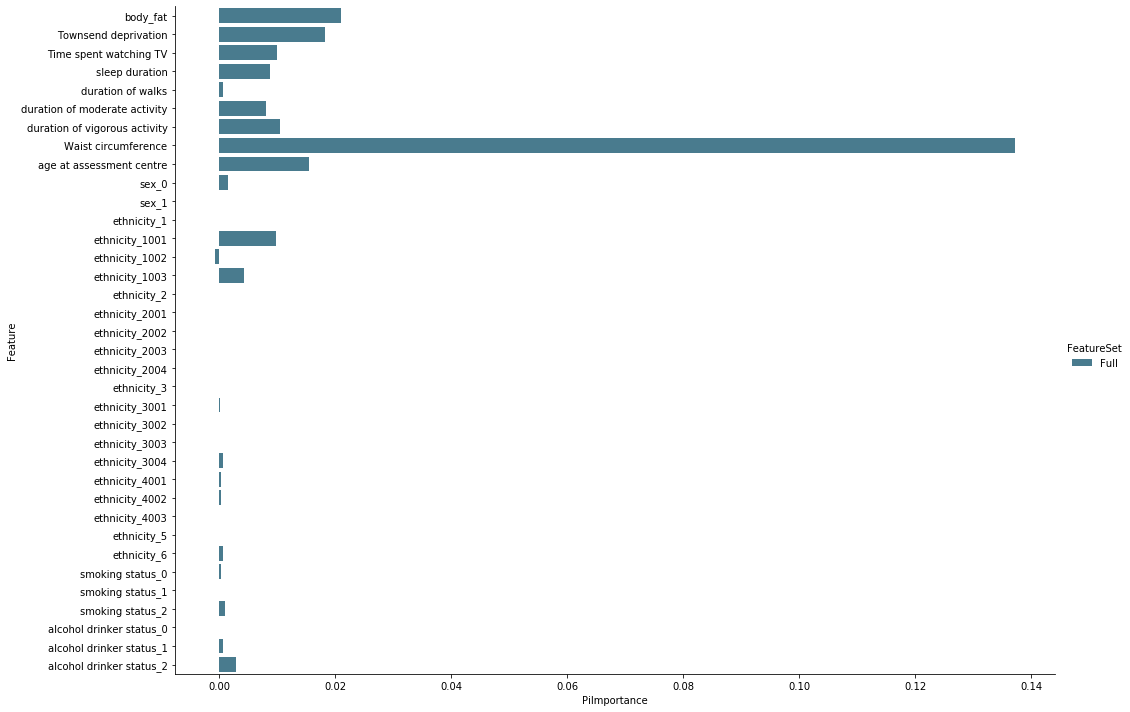

In [96]:
# XG Permutation Importance
pi = permutation_importance(clf, X.iloc[test], y.iloc[test], n_jobs=2, n_repeats=10)
pi_imp = {'Feature': X.columns, 'PiImportance': pi.importances_mean, 'FeatureSet': "Full"}
pi_imp_df = pd.DataFrame(data=pi_imp)
sns.catplot(x='PiImportance', y='Feature', hue='FeatureSet', data=pi_imp_df, kind='bar', aspect=1.5, palette = current_palette, height = 10)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


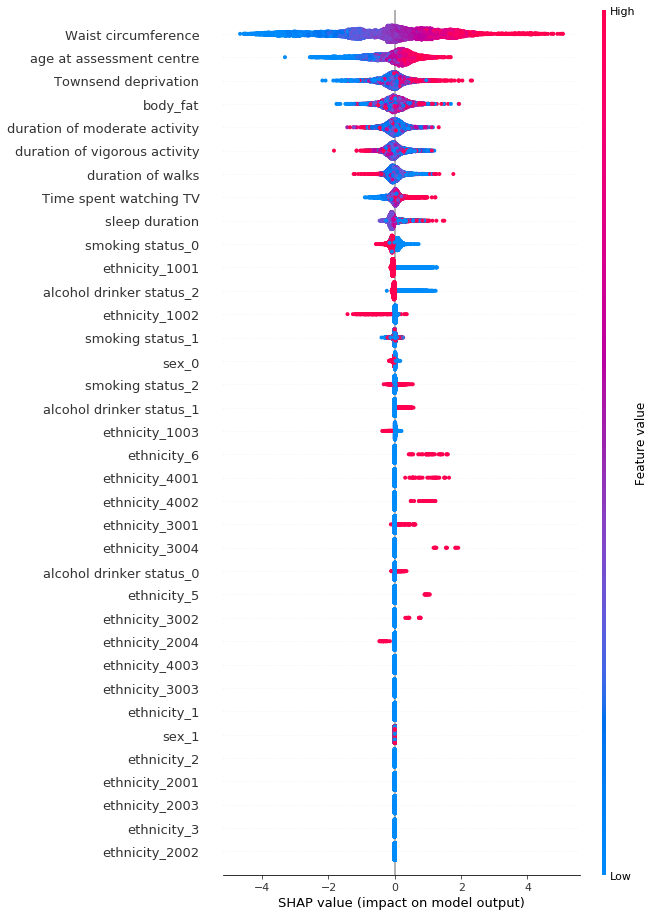

In [97]:
# XG Shap Values
# decode issue workaround
mybooster = clf.get_booster()    
model_bytearray = mybooster.save_raw()[4:]
mybooster.save_raw = changeByteLoc


shap_values = shap.TreeExplainer(mybooster).shap_values(X.iloc[train])
shap.summary_plot(shap_values, X.iloc[train], feature_names=X.columns, max_display=100)